### Model assessment
Here we compared the weights learned by several model iterations, to highlight
- Performance user parameter combinations
- Interpretation based on TF regulators
- Coherence or learned graph-weights when assisting RNA-weights, or only using ATAC-weights

In [166]:
print('here...')

here...


In [167]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
!nvidia-smi

Wed Aug  7 13:24:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        Off | 00000000:01:00.0  On |                  N/A |
|  0%   45C    P2              42W / 320W |   4259MiB / 16376MiB |      7%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [169]:
cd ~/workspace/theislab/mubind/docs/notebooks/single_cell

/home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell


In [170]:
!ls -ltrh /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome*

-rwxrwxr-x 1 ilibarra ilibarra 1.8M Jun 10 10:55 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_0.pth
-rwxrwxr-x 1 ilibarra ilibarra 1.8M Jun 10 10:55 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_1.pth
-rw-rw-r-- 1 ilibarra ilibarra 2.7M Jun 11 00:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_0_obs912.pth
-rw-rw-r-- 1 ilibarra ilibarra 2.8M Jun 11 00:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_1_obs912.pth
-rw-rw-r-- 1 ilibarra ilibarra 9.8M Jun 11 20:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_0_obs4148.pth
-rw-rw-r-- 1 ilibarra ilibarra  11M Jun 11 20:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_1_obs4148.pth
-rw-rw-r-- 1 ilibarra ilibarra 1.6

In [171]:
# pip install matplotlib==3.7.2

In [172]:
import torch
import mubind as mb
import scanpy as sc

In [173]:
# load models
model_by_logdynamic = {}
for use_logdynamic in [False, True]:
    # the prepring case (4148)
    # hadamard 8161
    p = "pancreas_multiome_use_logdynamic_%i_obs8161.pth" % use_logdynamic
    print(p)
    model_by_logdynamic[use_logdynamic] = torch.load(p)

pancreas_multiome_use_logdynamic_0_obs8161.pth
pancreas_multiome_use_logdynamic_1_obs8161.pth


In [174]:
print('here...')

here...


In [175]:
!ls -ltrh /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/atac_train*

-rw-rw-r-- 1 ilibarra ilibarra 52M Jul 21 01:46 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/atac_train.h5ad


In [176]:
ad = sc.read_h5ad("atac_train.h5ad")
rna_sample = sc.read_h5ad("rna_sample_train.h5ad")

In [177]:
import pickle


train = pickle.load(open("train_dataloader.pkl", "rb"))

In [178]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [179]:
!readlink -f .

/home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell


In [180]:
# load the pancreas multiome dataset
rna, atac = mb.datasets.pancreas_multiome(data_directory="../../../../../../annotations/single_cell")

True data/scatac/pancreas_multiome/pancreas_multiome_2022_processed_rna_velocities_2024.h5ad
True data/scatac/pancreas_multiome/pancreas_multiome_2022_processed_atac.h5ad


In [181]:
# %lprun -f model.forward model.optimize_iterative(train, n_epochs=10, skip_kernels=list([0]) + list(range(2, 500)), opt_kernel_shift=[0, 0] + [0] * (n_kernels), opt_kernel_length=[0, 0] + [0] * (n_kernels))

In [182]:
# %lprun -f model.binding_modes.forward model.optimize_iterative(train, n_epochs=10, skip_kernels=list([0]) + list(range(2, 500)), opt_kernel_shift=[0, 0] + [0] * (n_kernels), opt_kernel_length=[0, 0] + [0] * (n_kernels))

In [183]:
import matplotlib.pyplot as plt

In [184]:
cell_type_key = "celltype"

Graph Layer |  False
break


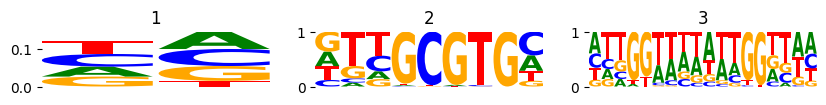

Graph Layer |  True
break


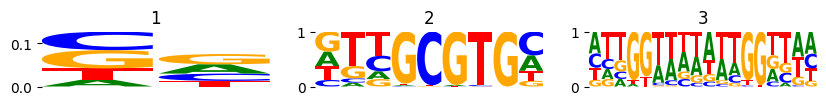

In [185]:
for optimize_log_dynamic in model_by_logdynamic:
    print("Graph Layer | ", optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]
    # print(optimize_log_dynamic)
    from matplotlib import rcParams

    rcParams["figure.figsize"] = 10, 5
    rcParams["figure.dpi"] = 100
    mb.pl.logo(model, n_cols=3, show=True, n_rows=6, stop_at=4)  #  log=True)
    plt.show()

True


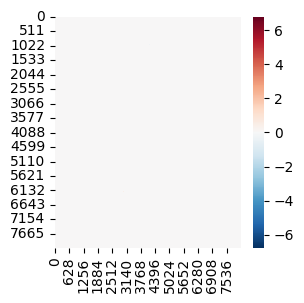

In [186]:
for optimize_log_dynamic in model_by_logdynamic:
    if not optimize_log_dynamic:
        continue
    model = model_by_logdynamic[optimize_log_dynamic]
    print(optimize_log_dynamic)

    tsum = torch.sum
    texp = torch.exp
    tspa = torch.sparse_coo_tensor
    tsmm = torch.sparse.mm
    t = torch.transpose

    # connectivities
    C = model.graph_module.conn_sparse
    a_ind = C.indices()

    log_dynamic = model.graph_module.log_dynamic
    D = model.graph_module.log_dynamic
    D_tril = tspa(a_ind, D, C.shape)  # .requires_grad_(True).cuda()
    D_triu = tspa(a_ind, -D, C.shape)  # .requires_grad_(True).cuda()
    D = D_tril + t(D_triu, 0, 1)
    # log_dynamic = log_dynamic + -torch.transpose(log_dynamic, 0, 1)
    # triu_indices = torch.triu_indices(row=n_rounds, col=n_rounds, offset=1)
    D

    import seaborn as sns

    mb.pl.set_rcParams({"figure.figsize": [3, 3]})
    sns.heatmap(D.to_dense().detach().cpu(), cmap="RdBu_r")
    plt.show()

In [187]:
model = model_by_logdynamic[1]

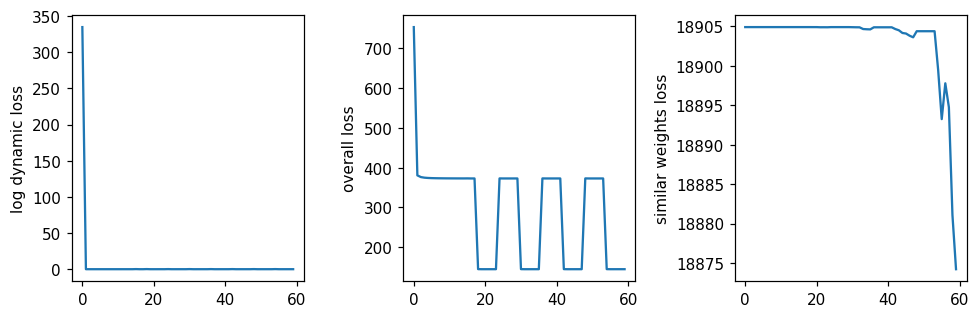

In [188]:
mb.pl.set_rcParams({"figure.figsize": [12, 3], "figure.dpi": 110})
plt.subplot(1, 4, 1)
plt.plot(model.loss_history_log_dynamic)
plt.ylabel("log dynamic loss")
plt.subplot(1, 4, 2)
plt.plot(model.loss_history)
plt.ylabel("overall loss")
plt.subplot(1, 4, 3)
plt.plot(model.loss_history_sym_weights)
plt.ylabel("similar weights loss")
plt.tight_layout()

plt.savefig('losses_pancreatic_endocrinogenesis.pdf')
plt.show()

In [189]:
import pandas as pd
import numpy as np

False
True


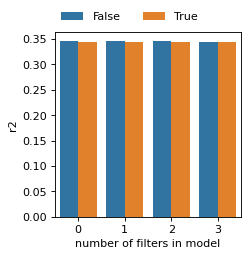

In [190]:
rcParams["figure.figsize"] = 3, 5
r2_all = []
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]
    # contributions per newly added kernel
    import seaborn as sns

    if len(model.best_r2_by_new_filter) != 0:
        r2 = pd.DataFrame(model.best_r2_by_new_filter, columns=["r2"]).reset_index()
        r2["opt_log_dynamic"] = optimize_log_dynamic
        r2_all.append(r2)

if len(r2_all) > 0:
    r2_all = pd.concat(r2_all)
    rcParams["figure.figsize"] = 3, 3
    rcParams["figure.dpi"] = 80
    ax = sns.barplot(
        data=r2_all,
        x="index",
        y="r2",
        hue="opt_log_dynamic",
    )
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.4, 1), ncol=3, title=None, frameon=False)

    plt.xlabel("number of filters in model")
    plt.show()

In [191]:
model = model_by_logdynamic[True]

torch.set_printoptions(precision=2)
dynamic_score = D.to_dense().detach().cpu().sum(axis=0)
# dyn_score
dynamic_score = dynamic_score
dynamic_score = (dynamic_score - dynamic_score.min()) / (dynamic_score.max() - dynamic_score.min())
ad.obs["dynamic_score"] = dynamic_score

ad.obs["dynamic_score_cluster"] = np.where(dynamic_score > dynamic_score.mean(), "dynamic", "static")
z0 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 0.75, "dynamic", "static")
z1 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 1, "dynamic", "static")
z2 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 2, "dynamic", "static")

ad.obs["dynamic_score_z0"] = z0
ad.obs["dynamic_score_z1"] = z1
ad.obs["dynamic_score_z2"] = z2

In [192]:
ad.obs[[c for c in ad.obs if 'dynamic' in c]].describe()

dynamic_score
count    8161.000000
mean        0.308962
std         0.040538
min         0.000000
25%         0.308942
50%         0.308962
75%         0.308974
max         1.000000

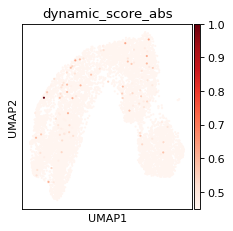

In [193]:
ad.obs["dynamic_score_abs"] = ad.obs["dynamic_score"].abs()
sc.pl.umap(ad, color="dynamic_score_abs", color_map="Reds", vmin=0.45)

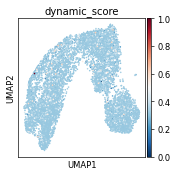

z0


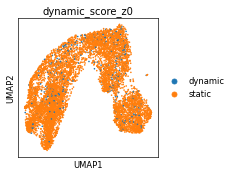

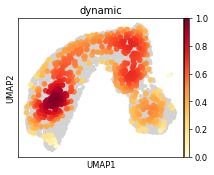

z1


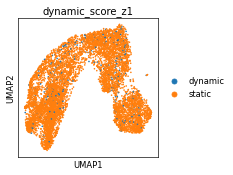

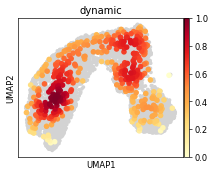

z2


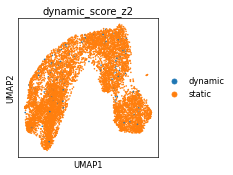

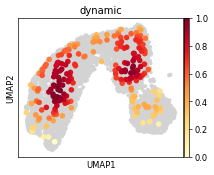

In [194]:
# contributions per newly added kernel
mb.pl.set_rcParams({"figure.figsize": [3, 3], "figure.dpi": 60})

sc.pl.umap(ad, color=["dynamic_score"], cmap="RdBu_r", sort_order=True)

for z in ['z0', 'z1', 'z2']:
    print(z)
    sc.pl.umap(ad, color=["dynamic_score_%s" % z], cmap="RdBu_r", sort_order=True)
    sc.tl.embedding_density(ad, basis="umap", groupby="dynamic_score_%s" % z)
    sc.pl.embedding_density(
        ad, basis="umap", key="umap_density_dynamic_score_%s" % z, group="dynamic"
    )  # basis='umap', groupby='dynamic_score_cluster')


<Axes: >

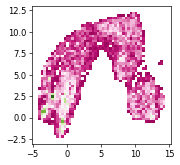

In [195]:
import seaborn as sns

umap = ad.obsm["X_umap"]
sns.histplot(x=umap[:, 0], y=umap[:, 1], bins=50, cmap="PiYG")

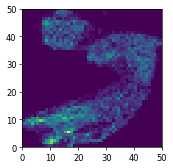

In [196]:
plt.pcolormesh(np.histogram2d(umap[:, 0], umap[:, 1], bins=50)[0])

In [197]:
x, y = np.meshgrid(umap[:, 0], umap[:, 1])

In [198]:
x = umap[:, 1]  # array_txt[:,0]
y = umap[:, 1]  # array_txt[:,1]
z = ad.obs["dynamic_score"].values  # array_txt[:,2]

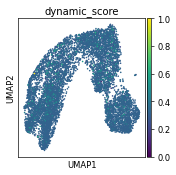

In [199]:
sc.pl.umap(ad, color="dynamic_score")

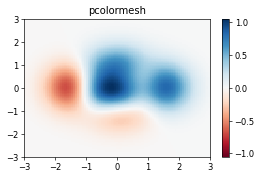

In [200]:
import matplotlib.pyplot as plt
import numpy as np

rcParams["figure.figsize"] = 5, 3

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z = (1 - x / 2.0 + x**5 + y**3) * np.exp(-(x**2) - y**2)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap="RdBu", vmin=z_min, vmax=z_max)
ax.set_title("pcolormesh")
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [201]:
import itertools
import numpy as np


def grid(x, y, z, size_x=1, size_y=1):

    def pairwise(iterable):
        "s -> (s0,s1), (s1,s2), (s2, s3), ..."
        a, b = itertools.tee(iterable)
        next(b, None)
        return zip(a, b)

    minx, maxx = int(min(x)), int(max(x)) + 1
    miny, maxy = int(min(y)), int(max(y)) + 1

    result = []
    x_edges = pairwise(np.arange(minx, maxx + 1, size_x))
    for xleft, xright in x_edges:
        xmask = np.logical_and(x >= xleft, x < xright)
        y_edges = pairwise(np.arange(miny, maxy + 1, size_y))
        for yleft, yright in y_edges:
            ymask = np.logical_and(y >= yleft, y < yright)
            cell = z[np.logical_and(xmask, ymask)]
            result.append(cell.sum())

    result = np.array(result).reshape((maxx - minx, maxy - miny))
    return np.flip(result.T, 0)

In [202]:
grid_dyn_score = grid(umap[:, 0], umap[:, 1], ad.obs["dynamic_score"], size_x=1, size_y=1)
grid_counts = grid(umap[:, 0], umap[:, 1], ad.obs["celltype"].cat.codes.values, size_x=1, size_y=1)

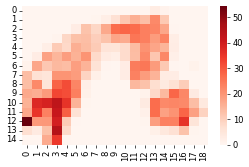

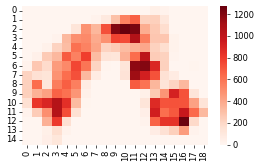

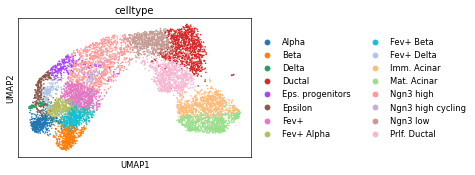

In [203]:
sns.heatmap(grid_dyn_score, cmap="Reds")
plt.show()
sns.heatmap(grid_counts, cmap="Reds")
plt.show()

sc.pl.umap(ad, color="celltype")

In [204]:
# for optimize_log_dynamic in model_by_logdynamic:
#     mb.pl.set_rcParams({'figure.figsize': [3, 3], 'figure.dpi': 90})
#     print(optimize_log_dynamic)
#     model = model_by_logdynamic[optimize_log_dynamic]
#     mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1', k=8)
#     plt.show()

#     mb.pl.set_rcParams({'figure.figsize': [10, 7], 'figure.dpi': 90})
#     mb.pl.logo(model,
#                title=False,
#                xticks=False,
#                rowspan_dinuc=0,
#                rowspan_mono=1,
#                n_rows=12,
#                n_cols=3,
#                stop_at=20) # n_cols=len(reduced_groups))
#     plt.show()

In [205]:
model = model_by_logdynamic[True]

In [206]:
G = model.graph_module.conn_sparse.detach().cpu().to_dense()  # (C, C)

In [207]:
# number of non_zero weights
len(G[G != 0])

111684

In [208]:
# output = model(**inputs, use_conn=False, return_binding_scores=True)

In [209]:
print("here...")

here...


In [210]:
ad

AnnData object with n_obs × n_vars = 8161 × 8459
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'dynamic_score', 'dynamic_score_cluster', 'dynamic_score_z0', 'dynamic_score_z1', 'dynamic_score_z2', 'dynamic_score_abs', 'umap_density_dynamic_score_z0', 'umap_density_dynamic_score_z1', 'umap_density_dynamic_score_z2'
    var: 'modality', 'acc_score', 'acc_score_rank', 'chr', 'start', 'end', 'summit', 'summit.start', 'summit.end', 'k.summit'
    uns: 'celltype_colors', 'neighbors', 'dynamic_score_z0_colors', 'umap_density_dynamic_score_z0_params', 'dynamic_score_z1_colors', 'umap_density_dynamic_score_z1_params', 'dynamic_score_z2_colors', 'umap_density_dynamic_score_z2_params'
    obsm: 'X_pca', 'X_pca_wsnn', 

In [211]:
model = model.cuda()

In [212]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device

In [213]:
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    if not optimize_log_dynamic:
        continue
    model = model_by_logdynamic[optimize_log_dynamic].cuda()

    umap = ad.obsm["X_umap"].copy()
    umap = np.sort(umap, 0)

    x = umap[:, 0]
    y = umap[:, 1]
    X, Y = np.meshgrid(x, y)

    n_points = x.shape[0]
    # x-component to the right
    u = np.ones((n_points, n_points))
    # y-component zero
    v = np.zeros((n_points, n_points))

    pred = []
    binding_per_mode = []
    for i, batch in enumerate(train):
        # Get a batch and potentially send it to GPU memory.
        mononuc = batch["mononuc"].to(device)
        # print(i, mononuc.shape)
        b = batch["batch"].to(device) if "batch" in batch else None
        rounds = batch["rounds"].to(device) if "rounds" in batch else None
        countsum = batch["countsum"].to(device) if "countsum" in batch else None
        seq = batch["seq"] if "seq" in batch else None
        residues = batch["residues"].to(device) if "residues" in batch else None
        if residues is not None and train.dataset.store_rev:
            mononuc_rev = batch["mononuc_rev"].to(device)
            inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum, "residues": residues}
        elif residues is not None:
            inputs = {"mono": mononuc, "batch": b, "countsum": countsum, "residues": residues}
        elif train.dataset.store_rev:
            mononuc_rev = batch["mononuc_rev"].to(device)
            inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum}
        else:
            inputs = {"mono": mononuc, "batch": b, "countsum": countsum}

        inputs["scale_countsum"] = model.datatype == "selex"
        output = model(**inputs, use_conn=False, return_binding_scores=True)
        output = output.cpu().detach().numpy()
        # print("here...")
        # print(output.shape)
        # print(output.sum())
        pred.append(output)


        output = model(**inputs, use_conn=False, return_binding_per_mode=True)
        output = output.cpu().detach().numpy()
        # print("here...")
        # print(output.shape)
        # print(output.sum())
        binding_per_mode.append(output)

    # pred = np.concatenate(pred).T

    binding_scores = np.concatenate(pred).T
    binding_per_mode = np.concatenate(binding_per_mode)

    # ad.layers['velocity'] = pred

    # conn = model.graph_module.conn_sparse.detach().cpu()
    # conn = model.graph_module.conn_sparse.detach().cpu().to_dense()
    # v = conn.sum(axis=1)
    # ad.layers['velocity'] = torch.stack([v,] * ad.shape[1], axis=1).numpy()

    # ad.layers['counts'] = ad.X

    # mb.pl.set_rcParams({'figure.figsize': [5, 4], 'figure.dpi': 90})
    # plt.hist(model.graph_module.conn_sparse.values().detach().cpu().numpy())
    # plt.show()

    # import scvelo as scv

    # sc.pp.neighbors(ad)

    # # scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
    # # ad.layers['velocity'] = ad.obs['dynamic_score']

    # scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
    # ax = scv.pl.velocity_embedding_stream(ad, color='celltype', show=False) #  X_grid='X_umap', V=V)


X = ad.X.A
G @ binding_scores
np.random.shuffle(binding_scores)

False
True


In [214]:
ad.shape, binding_per_mode.shape

((8161, 8459), (8459, 288))

In [215]:
import scvelo as scv

In [216]:
ad.shape, binding_per_mode.shape

((8161, 8459), (8459, 288))

In [217]:
ad
ad.layers["velocity"] = binding_scores
# scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
# ax = scv.pl.velocity_embedding_stream(ad, color='celltype', show=False) #  X_grid='X_umap', V=V)

In [218]:
np.random.shuffle(binding_scores)
binding_scores

array([[3149107.8, 3496001.5, 2688963.5, ..., 2099237.2, 1957583.9,
        2095233.5],
       [3141315.5, 3485802.5, 2684052.5, ..., 2095996.2, 1954719. ,
        2091825.1],
       [3132481.2, 3473488. , 2678872.2, ..., 2094459.4, 1953371.2,
        2090248.5],
       ...,
       [3133303.8, 3474516.2, 2679487.5, ..., 2094946.9, 1953766.1,
        2090715.1],
       [3132530.5, 3473445.2, 2678991.8, ..., 2094615.1, 1953490.1,
        2090407.4],
       [3130550. , 3471155. , 2677305.2, ..., 2093197.8, 1952281.1,
        2089117.6]], dtype=float32)

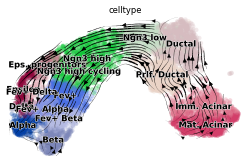

In [219]:
try:
    scv.pl.velocity_embedding_stream(rna_sample, color="celltype")
except Exception:
    print("sample too small.")

In [220]:
# np.random.shuffle(binding_scores)
# ad.layers['velocity'] = binding_scores
# scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
# ax = scv.pl.velocity_embedding_stream(ad, color='celltype', show=False) #  X_grid='X_umap', V=V)

<Axes: >

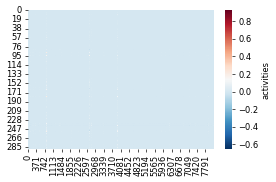

In [221]:
import seaborn as sns


act = model.get_log_activities().detach().cpu().squeeze(0)

sns.heatmap(act, cmap="RdBu_r", cbar_kws={"label": "activities"})

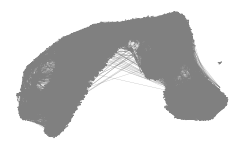

In [222]:
scv.pl.velocity_graph(rna)

In [223]:
# ax = scv.pl.velocity_embedding_stream(ad,
#                                       color='celltype',
#                                       # density=2,
#                                       arrow_color='black',
#                                       n_neighbors=15) # show=False) #  X_grid='X_umap', V=V)

In [224]:
# ax = scv.pl.velocity_embedding_stream(ad, color='celltype', density=2, arrow_color='black', n_neighbors=15) # show=False) #  X_grid='X_umap', V=V)

In [225]:
# scv.pl.velocity_embedding_stream(ad, color='celltype', n_neighbors=15) #  X_grid='X_umap', V=V)

## Study the asssociations betweeen obtained weights and cluster-specific transcription factors

Load information from archetypes DB (Vierstra et al 2020)

In [226]:
rna_sample, ad.shape

(AnnData object with n_obs × n_vars = 8161 × 14663
     obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'batch', 'velocity_self_transition'
     var: 'modality', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'celltype_colors', 'neighbors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
     obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'lsi_full', 'lsi_red', 'umap', 'umap_ATAC', 'umap_GEX', 'velocity_umap'
     layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced',

In [227]:
rna_sel = rna_sample  # rna[rna.obs_names.isin(ad.obs_names),:].copy()
rna_sel.shape

(8161, 14663)

In [228]:
pwd

'/home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell'

In [229]:
import bindome as bd


bd.constants.ANNOTATIONS_DIRECTORY = "annotations"



anno = mb.datasets.archetypes_anno()

In [230]:
rna_sel.shape
anno.sort_values("Cluster_ID")

Cluster_ID          Name          DBD             Seed_motif  Total_width  Consensus_left  Consensus_right  Cluster_size
61            1          HD/1  homeodomain     LHX6_homeodomain_3           12               0               12             2
72            2          HD/2  homeodomain          ALX3_MA0634.1           26               8               16           186
79            3          HD/3  homeodomain    VENTX_homeodomain_2           21               3               20             1
80            4          HD/4  homeodomain  BARX1_MOUSE.H11MO.0.C           17               5               13            17
81            5          HD/5  homeodomain    BARX1_homeodomain_1           21               2               18             6
..          ...           ...          ...                    ...          ...             ...              ...           ...
163         282         PAX/2          PAX   PAX5_HUMAN.H11MO.0.A           24               4               21             3
161         283  PAX-halfsite          PAX          Pax2_MA0067.1            8               1                7             1
0           284           AHR         bHLH    AHR_HUMAN.H11MO.0.B            9               2                8             3
105         285      KLF/SP/3         C2H2   KLF8_HUMAN.H11MO.0.C            9               0                9             2
285         286        ZSCAN4         C2H2          ZSCAN4_C2H2_1           15               1               14             2

[286 rows x 8 columns]

False


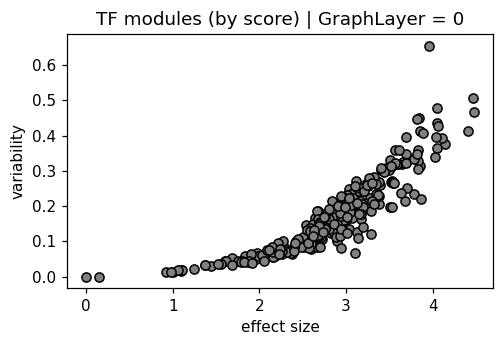

True


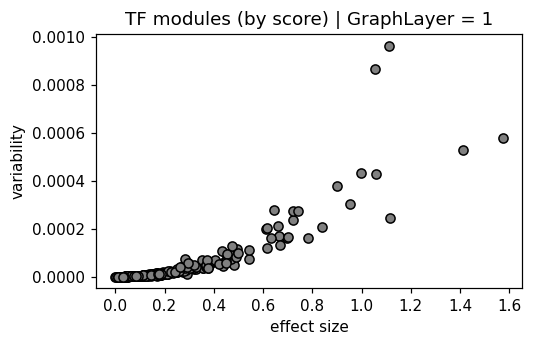

In [231]:
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]
    log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act = pd.DataFrame(log_act.detach().cpu().numpy())
    # log_act.columns = anno['Seed_motif'][2]
    # log_act.columns = ['intercept', 'dinuc_bias'] + list(anno['Seed_motif'].values)
    log_act.index = ad.obs_names
    ad.obsm["mubind_activities"] = log_act

    mb.pl.set_rcParams({"figure.figsize": [5, 3], "figure.dpi": 110})
    delta = log_act.max(axis=0) - log_act.min(axis=0)
    var = log_act.var(axis=0)
    plt.scatter(delta, var, color="gray", edgecolors="black")
    plt.xlabel("effect size")
    plt.ylabel("variability")
    plt.title("TF modules (by score) | GraphLayer = %i" % optimize_log_dynamic)
    plt.show()

In [232]:
# unique names for annotation
names = anno["Name"]  # .sort_values('Name')
added = dict()
new_name = []
for name in names:
    if not name in added:
        new_name.append(name)
        added[name] = 0
    else:
        new_name.append(name + "_%i" % added[name])
        added[name] += 1
anno["Name_unique"] = new_name

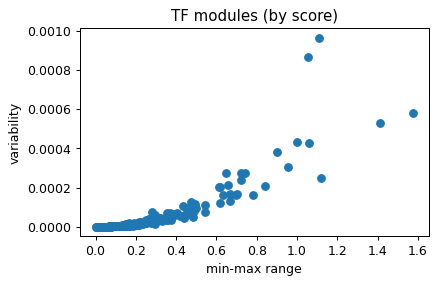

In [233]:
from scipy.stats import spearmanr


res = []

for optimize_log_dynamic in model_by_logdynamic:

    if not optimize_log_dynamic:
        continue


    model = model_by_logdynamic[optimize_log_dynamic]

    log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)

    log_act = pd.DataFrame(log_act.detach().cpu().numpy())

    # log_act.columns = anno['Seed_motif'][2]

    log_act.columns = ["intercept", "dinuc_bias"] + list(range(1, 287))

    log_act.index = ad.obs_names

    ad.obsm["mubind_activities"] = log_act


    mb.pl.set_rcParams({"figure.figsize": [5, 3], "figure.dpi": 90})

    delta = log_act.max(axis=0) - log_act.min(axis=0)

    var = log_act.var(axis=0)

    plt.scatter(delta, var)

    plt.xlabel("min-max range")

    plt.ylabel("variability")

    plt.title("TF modules (by score)")

    plt.show()


    for c in log_act:

        a = log_act[c]

        b = ad.obs["dynamic_score"].values

        # print(a.shape, b.shape)

        res.append([optimize_log_dynamic, c] + list(spearmanr(a, b)))


res = pd.DataFrame(res, columns=["opt_log_dynamic", "archetype_id", "spearman", "p_val"])

In [234]:
# add archetypes name
meta = pd.DataFrame(pd.concat([delta, var], axis=1))
meta.columns = ["max_effect", "variability"]
meta["name"] = ["intercept", "dinuc_bias"] + list(range(1, 287))
clu = mb.datasets.archetypes_clu()
meta["archetypes_name"] = meta["name"].map(anno.set_index("Cluster_ID")["Name_unique"])
meta["archetypes_name"] = np.where(pd.isnull(meta["archetypes_name"]), meta["name"], meta["archetypes_name"])

meta["archetypes_seed"] = meta["name"].map(anno.set_index("Cluster_ID")["Seed_motif"])
meta = meta.sort_values("max_effect", ascending=0)
meta

res = res.merge(meta, left_on="archetype_id", right_on="name")
res = res.sort_values("p_val", ascending=True)

In [235]:
name_by_filter_id = meta["archetypes_name"].to_dict()
# name_by_filter_id

## Observe general scores per case

<Axes: xlabel='max_effect', ylabel='archetypes_name'>

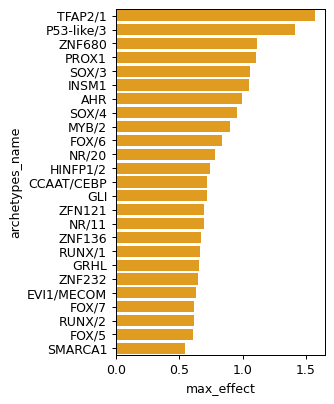

In [236]:
rcParams["figure.figsize"] = 3, 5
sns.barplot(
    data=res.sort_values("max_effect", ascending=False).head(25), x="max_effect", y="archetypes_name", color="orange"
)

In [237]:
res

opt_log_dynamic archetype_id  spearman         p_val  max_effect   variability       name archetypes_name          archetypes_seed
0               True    intercept -0.128655  1.830220e-31    0.000008  6.168964e-14  intercept       intercept                      NaN
142             True          141 -0.127593  5.705907e-31    0.275390  1.983516e-05        141          ZNF667    ZN667_HUMAN.H11MO.0.C
102             True          101 -0.122309  1.416205e-28    0.106169  3.267231e-06        101          NFAC/2    NFAC1_HUMAN.H11MO.0.B
254             True          253 -0.121638  2.803525e-28    0.037421  2.330403e-07        253           MYB/1           MYBL1_MA0776.1
236             True          235 -0.120579  8.185001e-28    0.646299  2.766286e-04        235          ZNF232            ZNF232_C2H2_1
..               ...          ...       ...           ...         ...           ...        ...             ...                      ...
44              True           43 -0.038936  4.344710e-04    0.192272  1.223356e-05         43           NR/14  NR2E1_nuclearreceptor_1
48              True           47 -0.033646  2.366103e-03    0.541450  7.312555e-05         47           NR/18      NR1A4+RXRA_MA1146.1
93              True           92 -0.030275  6.235055e-03    1.058410  4.285645e-04         92           SOX/3              SOX10_HMG_4
18              True           17 -0.029660  7.371100e-03    0.476006  6.549768e-05         17           CUX/4     CUX2_MOUSE.H11MO.0.C
94              True           93 -0.024814  2.498141e-02    0.953630  3.050420e-04         93           SOX/4              SOX10_HMG_1

[288 rows x 9 columns]

In [238]:
pd.options.display.width = 1000

break


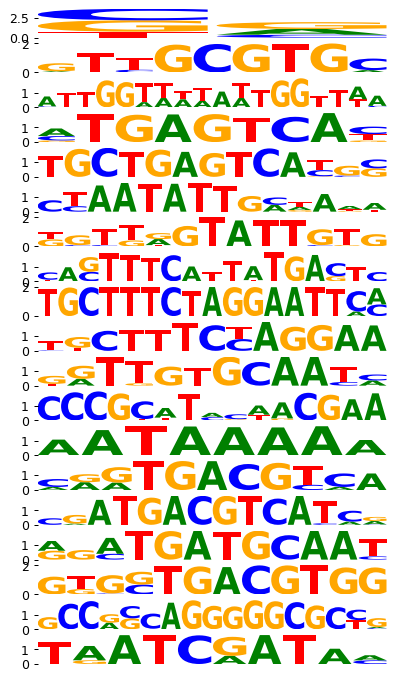

In [239]:
# visualize the logos as obtained by the model in each step
mb.pl.set_rcParams({"figure.figsize": [5, 20], "figure.dpi": 90})
# mb.pl.logo(model, title=False, xticks=False, rowspan_dinuc=0, rowspan_mono=1, n_rows=40, n_cols=1, stop_at=5, log_odds=False)
mb.pl.logo(model, title=False, xticks=False, rowspan_dinuc=0, rowspan_mono=1, n_rows=40, n_cols=1, stop_at=20, log_odds=True)
# n_rows=len(res.head(20).index),

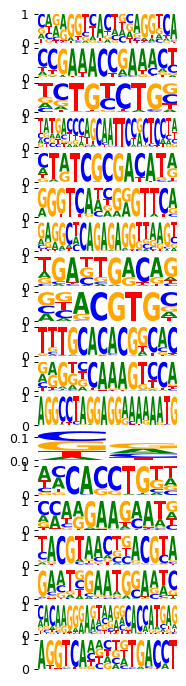

<Figure size 180x1800 with 0 Axes>

In [240]:
mb.pl.set_rcParams({"figure.figsize": [2, 20], "figure.dpi": 90})
mb.pl.logo(
    model,
    title=False,
    xticks=False,
    rowspan_dinuc=0,
    rowspan_mono=1,
    n_rows=40,
    # n_rows=len(res.head(20).index),
    n_cols=1,
    order=res.head(20).index,
)  # n_cols=len(reduced_groups))
plt.tight_layout()
plt.show()

In [241]:
import resource

print("total GB used:", resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1e6)

total GB used: 17.484232


In [242]:
# for k in ad.obsm['log_activities'].iloc[:,2:]:
#     ad.obs[str(k)] = ad.obsm['log_activities'][k]
# sc.pl.umap(ad, color=map(str, ad.obsm['log_activities'].iloc[:,2:]), cmap='Reds')

In [243]:
rna_sel.obsm["X_umap"] = ad.obsm["X_umap"]

In [244]:
def find_varname(ad, k, shuffle=False):
    if not shuffle:
        return ad.var_names[ad.var_names.str.upper().str.startswith(k.upper())]
    else:
        ad_sel = ad.var_names[ad.var_names.str.upper().str.startswith(k.upper())]
        return pd.Series(ad.var_names).sample(ad_sel.shape[0]).values

In [245]:
from scipy.stats import spearmanr, pearsonr

Calculate global correlations between the activities obtained per motif and gene-specific expression

In [246]:
all_targets = set()
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]

    log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act = pd.DataFrame(log_act.detach().cpu().numpy())
    log_act.index = ad.obs_names

    ad.obsm["log_activities"] = log_act
    ad.obsm["log_activities"].columns = ["intercept", "dinuc_bias"] + list(range(1, 287))

    # collect all targets
    for k in ad.obsm["log_activities"].iloc[:, 2:]:
        log_act = ad.obsm["log_activities"][k].values
        names = set()
        clu_sel = clu[clu["Cluster_ID"] == k]["Motif"]
        for g in clu_sel:
            names.add(g.split("_")[0].split(".")[0].split("+")[0].upper())
        for g in anno[anno["Cluster_ID"] == k]["Seed_motif"]:
            names.add(g.split("_")[0].split(".")[0])
        # print(k, names)
        targets = set()
        for name in names:
            target = find_varname(rna_sel, name)
            for t in target:
                all_targets.add(t)
        if len(targets) > 0 and False:
            sc.pl.umap(rna_sel, color=targets, cmap="Reds")

False
True


In [247]:

def get_act_gene_corr(model_by_logdynamic, shuffle=False, random_state=0):
    print('association between motif activities and related TF targets (shuffle = %i)' % shuffle)
    res = []
    # print(len(all_targets))

    rna_sel_df = rna_sel.to_df()

    for optimize_log_dynamic in model_by_logdynamic:
        print('use GraphLayer = %i' % optimize_log_dynamic)
        model = model_by_logdynamic[optimize_log_dynamic]

        log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
        log_act = pd.DataFrame(log_act.detach().cpu().numpy())
        log_act.index = ad.obs_names

        ad.obsm['log_activities'] = log_act
        ad.obsm['log_activities'].columns = ['intercept', 'dinuc_bias'] + list(range(1, 287))

        # if shuffle:
        #     random_cols = ad.obsm['log_activities'].iloc[:,2:].columns.values
        #     np.random.shuffle(random_cols)
        #     # random_cols
        
        for ki, k in enumerate(ad.obsm['log_activities'].iloc[:,2:]):
            next_log_act = ad.obsm['log_activities'][k].values

            # if shuffle:
            #     next_log_act = ad.obsm['log_activities'][random_cols[ki]].values
            
            # print(ki)
            # if ki % 30 == 0:
            #     print(ki)
            names = set()
            clu_sel = clu[clu['Cluster_ID'] == k]['Motif']
            for g in clu_sel:
                names.add(g.split('_')[0].split('.')[0].split('+')[0].upper())
            for g in anno[anno['Cluster_ID'] == k]['Seed_motif']:
                names.add(g.split('_')[0].split('.')[0])
            # print(k, names)
            next_targets = set()
            for name in names:
                target = find_varname(rna_sel, name, shuffle=shuffle)
                # print(name, target)
                for t in target:
                    next_targets.add(t)

            # for t in all_targets:
            for t in set(all_targets).intersection(next_targets):
                gex = rna_sel_df[[t]].to_numpy() # rna_sel_df[t].A
                assert gex.shape[1] == 1
                gex = gex.flatten()
                # print(next_log_act.shape, gex.shape)
                # print(t, pearsonr(next_log_act, gex))
                res.append([ki, optimize_log_dynamic, k, t, t in next_targets] +
                        list(spearmanr(next_log_act, gex)))
                
    res = pd.DataFrame(res, columns=['filter_id', 'opt_log_dynamic', 'archetype_id', 'gene_name', 'matched', 'spearman', 'p_val'])

    # p-values
    res['module_name'] = res['archetype_id'].map(anno.set_index('Cluster_ID')['Name'].to_dict())
    res['p_val'] = np.where(pd.isnull(res['p_val']), 1.0, res['p_val'])
    
    # p-val adjust
    from statsmodels.stats.multitest import fdrcorrection
    res['p_adj'] = fdrcorrection(res['p_val'])[1]
    return res


In [248]:
res = get_act_gene_corr(model_by_logdynamic)
print('\nRunning permutations...')
n_perm = 10
shuffled = []
for i in range(n_perm):
    print(i)
    shuffled.append(get_act_gene_corr(model_by_logdynamic, shuffle=1, random_state=i))
# shuffled = [get_act_gene_corr(model_by_logdynamic, shuffle=1, random_state=i) for i in range(50)]

association between motif activities and related TF targets (shuffle = 0)
use GraphLayer = 0
use GraphLayer = 1

Running permutations...
0
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
1
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
2
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
3
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
4
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
5
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
6
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
7
association between motif activities and related TF targets (sh

In [249]:
table = []
for use_graph in [False, True]:
    for thr in range(1, 10):
        sel = res[res['opt_log_dynamic'] == use_graph]
        next_thr = 10 ** (-thr)
        n_pos = sel[sel['p_adj'] < next_thr].shape[0]
        n_neg = [s[(s['p_adj'] < next_thr) & (s['opt_log_dynamic'] == use_graph)].shape[0] for s in shuffled]
        # print(next_thr, n_pos, np.mean(n_neg), np.std(n_neg), (n_pos - np.mean(n_neg)) / np.std(n_neg))
        table.append([next_thr, n_pos, np.mean(n_neg), np.std(n_neg), (n_pos - np.mean(n_neg)) / np.std(n_neg), use_graph])
table = pd.DataFrame(table, columns=['p_adj_thr', 'n_pos', 'mu', 'sigma', 'zscore', 'graph_layer'])
table.pivot(index='graph_layer', columns='p_adj_thr', values='zscore')

p_adj_thr    1.000000e-09  1.000000e-08  1.000000e-07  1.000000e-06  1.000000e-05  1.000000e-04  1.000000e-03  1.000000e-02  1.000000e-01
graph_layer                                                                                                                              
False           31.334015     34.002392     37.489375     40.020936     37.708280     39.008706     37.769714     36.797102     53.176760
True            11.323321     15.782326     17.472692     17.852956     26.473257     27.894030     36.992109     49.866102     79.052499

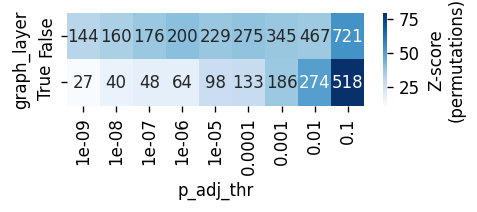

In [250]:
rcParams['figure.figsize'] = 4, 1
rcParams['figure.dpi'] = 120
rcParams['pdf.fonttype'] = 42
hm = table.pivot(index='graph_layer', columns='p_adj_thr', values='n_pos').fillna(0)
z = table.pivot(index='graph_layer', columns='p_adj_thr', values='zscore').fillna(0)
sns.heatmap(z, annot=hm, fmt='', cmap='Blues', # vmin=0, vmax=5,
            cbar_kws={'label': 'Z-score\n(permutations)'})

plt.savefig('../../../output/zscore_filter_act_gex_cor_pancreatic_endocrinogesis.pdf')
plt.show()

In [251]:
genes_by_module_name = (
    res.groupby(["module_name"])["gene_name"].apply(lambda grp: list(grp.value_counts().index)).to_dict()

)
# genes_by_module_name

In [252]:
res.sort_values("p_adj")

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman          p_val module_name          p_adj
277          68            False            69     Meis2     True  0.253829  3.531138e-120        MIES  1.363019e-116
1711        245            False           246      Rfx6     True -0.246340  4.372267e-113       RFX/3  8.438475e-110
1588        150            False           151      Rest     True  0.237454  5.574720e-105   REST/NRSF  7.172807e-102
1378         81            False            82    Pou3f4     True  0.227013   7.048015e-96       POU/2   6.801334e-93
1440         95            False            96       Ehf     True  0.219672   9.477964e-90       ETS/2   7.316988e-87
...         ...              ...           ...       ...      ...       ...            ...         ...            ...
3151         69             True            70   Thumpd1     True -0.000016   9.988485e-01       TBX/1   9.996254e-01
3448        108             True           109      Egr1     True  0.000016   9.988476e-01    KLF/SP/2   9.996254e-01
707          69            False            70  Tnfrsf22     True  0.000005   9.996116e-01       TBX/1   9.998707e-01
3084         69             True            70   Tpd52l1     True  0.000008   9.993975e-01       TBX/1   9.998707e-01
1409         91            False            92     Sox11     True -0.000002   9.998756e-01       SOX/3   9.998756e-01

[3860 rows x 9 columns]

In [253]:
res["k"] = res["gene_name"] + "_" + res["archetype_id"].astype(str)
df2 = res.pivot(index="k", columns="opt_log_dynamic", values="spearman")
# df2 = res # .pivot(index='k', columns='opt_log_dynamic', values='spearman')

In [254]:
df2

opt_log_dynamic     False     True 
k                                  
Ahr_284          0.041996  0.023966
Aire_139         0.008289  0.021390
Ap2a1_264       -0.028934 -0.017731
Ap2a2_264       -0.020486  0.005195
Ap2b1_264       -0.050461 -0.016013
...                   ...       ...
Zfp820_121       0.020229  0.011756
Zfp821_121       0.001718 -0.016109
Zfp825_121       0.018146  0.009312
Zfp827_121      -0.031124 -0.014224
Zfx_144          0.027819  0.030549

[1930 rows x 2 columns]

In [255]:
mb.pl.set_rcParams({"figure.figsize": [5, 4], "figure.dpi": 120})
# df2 = df2.sort_values('matched', ascending=True)
# plt.scatter(df2[True], df2[True],
#             color=np.where(df2['matched'], 'blue', 'gray'),
#             s=np.where(df2['matched'], 30, 5))
# plt.xlabel('TF activity (graph = off)')
# plt.ylabel('TF activity (graph = on)')
# plt.axhline(0, color='gray', ls='--', zorder=0)
# plt.axvline(0, color='gray', ls='--', zorder=0)

In [256]:
# df2[df2['matched'] == True].sort_values(True, ascending=False)

In [257]:
# res['arch_name'] = name_by_filter_id

In [258]:
res

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman     p_val   module_name     p_adj            k
0             1            False             2       Arx     True  0.009255  0.403149          HD/2  0.610018        Arx_2
1             1            False             2    Nkx6-1     True  0.019021  0.085759          HD/2  0.206763     Nkx6-1_2
2             1            False             2    Nkx6-2     True -0.023292  0.035371          HD/2  0.107590     Nkx6-2_2
3             1            False             2      Isl1     True -0.005631  0.611036          HD/2  0.777389       Isl1_2
4             1            False             2    Arid3b     True  0.000642  0.953766          HD/2  0.976794     Arid3b_2
...         ...              ...           ...       ...      ...       ...       ...           ...       ...          ...
3855        280             True           281   Pax6os1     True -0.041961  0.000150         PAX/1  0.001075  Pax6os1_281
3856        280             True           281      Pax2     True  0.013350  0.227853         PAX/1  0.417424     Pax2_281
3857        282             True           283      Pax2     True -0.003662  0.740838  PAX-halfsite  0.856844     Pax2_283
3858        283             True           284       Ahr     True  0.023966  0.030387           AHR  0.095566      Ahr_284
3859        284             True           285      Klf8     True -0.019348  0.080509      KLF/SP/3  0.197686     Klf8_285

[3860 rows x 10 columns]

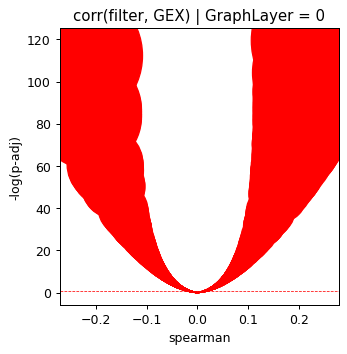

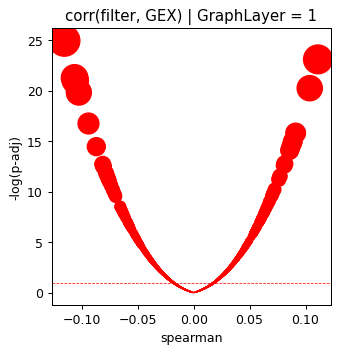

In [259]:
rcParams["figure.figsize"] = 4, 4
rcParams["figure.dpi"] = 90

for optimize_log_dynamic, grp in res.groupby("opt_log_dynamic"):
    grp["minus_log10_pval"] = -np.log10(grp["p_val"])
    grp = grp.sort_values("matched")
    plt.scatter(
        grp["spearman"],
        grp["minus_log10_pval"],
        s=np.power(grp["minus_log10_pval"], 2),
        color=np.where(grp["matched"], "red", "blue"),
    )
    plt.ylabel("-log(p-adj)")
    plt.xlabel("spearman")
    plt.title("corr(filter, GEX) | GraphLayer = %i" % optimize_log_dynamic)
    plt.axhline(1, ls="--", color="red", lw=0.6)
    plt.show()

In [260]:
# sc.pl.umap(ad, color=[96], cmap='RdBu_r')
# sc.pl.umap(rna_sel, color=['Ehf', 'Ergic2'], cmap='plasma')

Text(0, 0.5, '# associations')

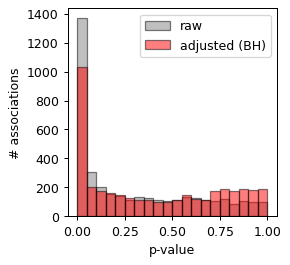

In [261]:
rcParams["figure.figsize"] = 3, 3
rcParams["figure.dpi"] = 90
plt.hist(res["p_val"], color="gray", bins=20, label="raw", alpha=0.5, edgecolor="black")
plt.hist(res["p_adj"], color="red", bins=20, label="adjusted (BH)", alpha=0.5, edgecolor="black")
plt.xlabel("p-value")
plt.legend()
plt.ylabel("# associations")

In [262]:
res[res["p_adj"] < 0.05]

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman         p_val module_name         p_adj            k
6             1            False             2      Pdx1     True  0.032841  3.006220e-03        HD/2  1.455961e-02       Pdx1_2
12            1            False             2      Pax4     True -0.033665  2.353099e-03        HD/2  1.184219e-02       Pax4_2
17            7            False             8       Arx     True -0.081863  1.295229e-13        HD/8  3.845833e-12        Arx_8
19            7            False             8    Arxes2     True  0.034815  1.657269e-03        HD/8  8.787167e-03     Arxes2_8
21            9            False            10     Hnf1b     True  0.029287  8.146837e-03       HD/10  3.348966e-02     Hnf1b_10
...         ...              ...           ...       ...      ...       ...           ...         ...           ...          ...
3842        262             True           263    Tfap2c     True  0.027537  1.285757e-02     TFAP2/2  4.823149e-02   Tfap2c_263
3847        264             True           265      Ctcf     True  0.046348  2.806301e-05        CTCF  2.391241e-04     Ctcf_265
3849        267             True           268     Plag1     True -0.028093  1.115049e-02       PLAG1  4.317042e-02    Plag1_268
3854        280             True           281      Pax6     True -0.080454  3.368429e-13       PAX/1  9.490611e-12     Pax6_281
3855        280             True           281   Pax6os1     True -0.041961  1.495984e-04       PAX/1  1.075326e-03  Pax6os1_281

[1033 rows x 10 columns]

In [263]:
pval_thr = 1e-5
sel_genes = set(list(res[res["p_adj"] < pval_thr]["gene_name"]))

In [264]:
log_act = ad.obsm["log_activities"].copy()

In [265]:
log_act.shape

(8161, 288)

In [266]:
cols_act = ["intercept", "dinuc_bias"] + [name_by_filter_id[k] for k in log_act.columns[2:]]
log_act.columns = cols_act

In [267]:
log_act

intercept  dinuc_bias          HD/1      HD/2      HD/3      HD/4      HD/5      HD/6      HD/7      HD/8  ...   GMEB2/2   GMEB2/3     FOX/9     SIX/2     PAX/1     PAX/2  PAX-halfsite       AHR  KLF/SP/3    ZSCAN4
AAACAGCCAACAGCCT-1-0  3.806271e-08    0.000003  7.695544e-05  0.000185  0.000027  0.000018  0.000150  0.000090  0.000008  0.000290  ...  0.000683  0.000745  0.000040 -0.000298  0.000297  0.000039      0.000093  0.002540 -0.000023  0.000095
AAACAGCCAACCCTCC-1-0 -1.162185e-07   -0.000003  4.249436e-07 -0.001115 -0.000109 -0.000263 -0.000553 -0.000185 -0.001000 -0.002746  ... -0.000548 -0.005312 -0.000712 -0.001427 -0.005037 -0.000265     -0.002616 -0.003395 -0.000373 -0.000473
AAACAGCCACTAAGCC-1-0  1.481323e-06   -0.000031  4.224365e-04  0.061922  0.004885  0.001461  0.002665  0.008734  0.030506 -0.058731  ... -0.048243  0.090099  0.075321  0.071688  0.167776  0.009557      0.061679 -0.104413  0.061235 -0.030773
AAACAGCCAGGATAAC-1-0 -2.535439e-08   -0.000002 -6.218390e-06 -0.000374 -0.000033 -0.000034 -0.000129 -0.000039 -0.000187 -0.000504  ... -0.000163 -0.000923 -0.000504 -0.000577 -0.000655 -0.000044     -0.000708 -0.002082  0.000082 -0.000144
AAACAGCCATAAAGCA-1-0  1.866635e-07    0.000009  1.157708e-04  0.001055  0.000114  0.000441  0.000247  0.000247  0.000514  0.003035  ...  0.002118  0.002020  0.003678  0.002987  0.003853  0.000299      0.001518  0.003987  0.001712  0.000473
...                            ...         ...           ...       ...       ...       ...       ...       ...       ...       ...  ...       ...       ...       ...       ...       ...       ...           ...       ...       ...       ...
TTTGTGTTCACGAATC-1-1 -3.571261e-08   -0.000003 -2.040713e-05 -0.000369 -0.000042 -0.000082 -0.000164 -0.000066 -0.000259 -0.000607  ... -0.000259 -0.001202 -0.000679 -0.000618 -0.000922 -0.000043     -0.000762 -0.001915 -0.000268 -0.000198
TTTGTGTTCGAGCTAT-1-1 -3.510256e-08   -0.000002  2.103153e-05 -0.000582 -0.000046 -0.000057 -0.000249 -0.000077 -0.000564 -0.001008  ... -0.000085 -0.001882 -0.000534 -0.001164 -0.000909 -0.000017     -0.001656 -0.002895 -0.000303 -0.000225
TTTGTGTTCTCAATGA-1-1 -4.718245e-08   -0.000003 -3.709015e-05 -0.000300 -0.000047 -0.000153 -0.000134 -0.000069 -0.000327 -0.000638  ... -0.000368 -0.001265 -0.000826 -0.000719 -0.001065 -0.000046     -0.000662 -0.001764 -0.000471 -0.000174
TTTGTTGGTATTGAGT-1-1 -3.771812e-08   -0.000003 -1.994044e-05 -0.000378 -0.000042 -0.000116 -0.000139 -0.000064 -0.000266 -0.000597  ... -0.000290 -0.001464 -0.000433 -0.000576 -0.000906 -0.000041     -0.000935 -0.001973 -0.000344 -0.000205
TTTGTTGGTTGTTGCT-1-1 -4.738262e-08   -0.000003 -3.046263e-05 -0.000377 -0.000069 -0.000157 -0.000204 -0.000086 -0.000439 -0.001027  ... -0.000442 -0.001635 -0.000916 -0.000986 -0.000826 -0.000029     -0.001108 -0.002171 -0.000469 -0.000263

[8161 rows x 288 columns]

In [268]:
import anndata


ad_act = anndata.AnnData(log_act)

ad_act.obsm["X_umap"] = ad.obsm["X_umap"]

ad_act.obs = ad.obs

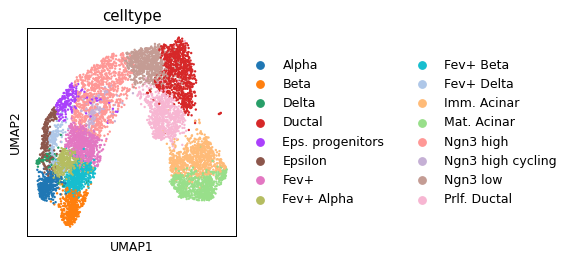

In [269]:
sc.pl.umap(ad_act, color="celltype")

Rank genes groups using the annotation

In [270]:
sc.tl.rank_genes_groups(ad_act, "celltype")
rkg_df = []
for ct in ad_act.obs["celltype"].values.unique():
    print(ct)
    rkg_df2 = sc.get.rank_genes_groups_df(ad_act, ct)
    rkg_df2["celltype"] = ct
    rkg_df.append(rkg_df2)
rkg_df = pd.concat(rkg_df)
rkg_df["module_name"] = rkg_df["names"].map(anno.set_index("Cluster_ID")["Name"].to_dict())
rkg_df["module_name"] = np.where(~pd.isnull(rkg_df["module_name"]), rkg_df["module_name"], rkg_df["names"])
rkg_df.head()

Fev+ Alpha
Fev+
Ngn3 high
Eps. progenitors
Ngn3 low
Fev+ Beta
Ductal
Fev+ Delta
Imm. Acinar
Alpha
Prlf. Ductal
Epsilon
Ngn3 high cycling
Beta
Delta
Mat. Acinar


names    scores  logfoldchanges     pvals  pvals_adj    celltype module_name
0     GCM  0.910906        3.654080  0.362733   0.627158  Fev+ Alpha         GCM
1  ZNF431  0.515329        4.179523  0.606397   0.835609  Fev+ Alpha      ZNF431
2   NR/15  0.422957             NaN  0.672541   0.905102  Fev+ Alpha       NR/15
3   HD/16  0.403896             NaN  0.686494   0.916561  Fev+ Alpha       HD/16
4   ARI5B  0.402635             NaN  0.687421   0.916561  Fev+ Alpha       ARI5B

Get top modules

In [271]:
ad_act.var_names = ad_act.var_names.map(rkg_df.set_index("names")["module_name"].to_dict())

In [272]:
sc.tl.rank_genes_groups(ad_act, "celltype")

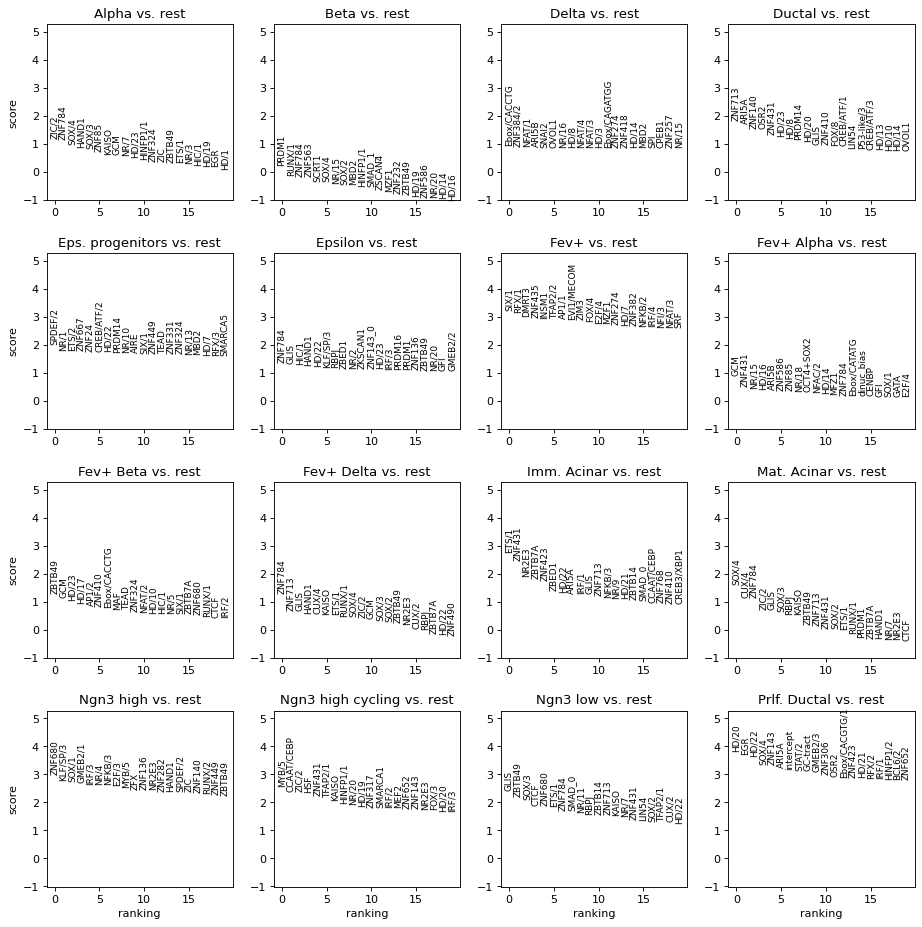

In [273]:
rcParams["figure.figsize"] = 3.5, 3.5
rcParams["figure.dpi"] = 80
sc.pl.rank_genes_groups(ad_act)

In [274]:
set(res[(res["p_adj"] < 1e-5)]["k"])

{'Araf_248',
 'Arc_248',
 'Arcn1_248',
 'Arel1_248',
 'Arf3_248',
 'Arf5_248',
 'Arf6_248',
 'Arfgap1_248',
 'Arfgap3_248',
 'Arfgef1_248',
 'Arfgef2_248',
 'Arfgef3_248',
 'Arhgap10_248',
 'Arhgap11a_248',
 'Arhgap18_248',
 'Arhgap19_248',
 'Arhgap21_248',
 'Arhgap24_248',
 'Arhgap26_248',
 'Arhgap28_248',
 'Arhgap32_248',
 'Arhgap35_248',
 'Arhgap36_248',
 'Arhgap42_248',
 'Arhgap5_248',
 'Arhgap6_248',
 'Arhgdig_248',
 'Arhgef11_248',
 'Arhgef12_248',
 'Arhgef19_248',
 'Arhgef26_248',
 'Arhgef38_248',
 'Arhgef39_248',
 'Arhgef40_248',
 'Arhgef5_248',
 'Arhgef6_248',
 'Arhgef7_248',
 'Arhgef9_248',
 'Arid1b_248',
 'Arid2_248',
 'Arid3b_248',
 'Arid4b_248',
 'Arih1_248',
 'Arih2_248',
 'Arl13b_248',
 'Arl15_248',
 'Arl3_248',
 'Arl4a_248',
 'Arl4c_248',
 'Arl6ip1_248',
 'Arl6ip4_248',
 'Arl8a_248',
 'Armc4_248',
 'Armc8_248',
 'Armc9_248',
 'Armh3_248',
 'Arnt_248',
 'Arpc1a_248',
 'Arpc1b_248',
 'Arpc2_248',
 'Arpc5_248',
 'Arpc5l_248',
 'Arpp19_248',
 'Arrdc4_248',
 'Arsa_248',
 'Ar

In [275]:
res[res["module_name"].str.contains("HD")].sort_values("p_adj")

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman         p_val module_name         p_adj          k
42           20            False            21      Pdx1     True  0.085723  8.687087e-15       HD/16  2.865996e-13    Pdx1_21
17            7            False             8       Arx     True -0.081863  1.295229e-13        HD/8  3.845833e-12      Arx_8
1933          1             True             2      Isl1     True -0.075389  9.154130e-12        HD/2  2.222323e-10     Isl1_2
23           11            False            12      Pbx1     True  0.065727  2.795715e-09       HD/12  5.042739e-08    Pbx1_12
1971         18             True            19     Meis1     True  0.053219  1.506326e-06       HD/14  1.680467e-05   Meis1_19
...         ...              ...           ...       ...      ...       ...           ...         ...           ...        ...
1974         20             True            21      Pbx2     True -0.002056  8.526826e-01       HD/16  9.218578e-01    Pbx2_21
1940          1             True             2    Dlx1as     True -0.001950  8.602075e-01        HD/2  9.268220e-01   Dlx1as_2
47           23            False            24    Arid3a     True -0.001547  8.888475e-01       HD/18  9.415344e-01  Arid3a_24
4             1            False             2    Arid3b     True  0.000642  9.537659e-01        HD/2  9.767940e-01   Arid3b_2
8             1            False             2      Mnx1     True -0.000469  9.662018e-01        HD/2  9.827507e-01     Mnx1_2

[68 rows x 10 columns]

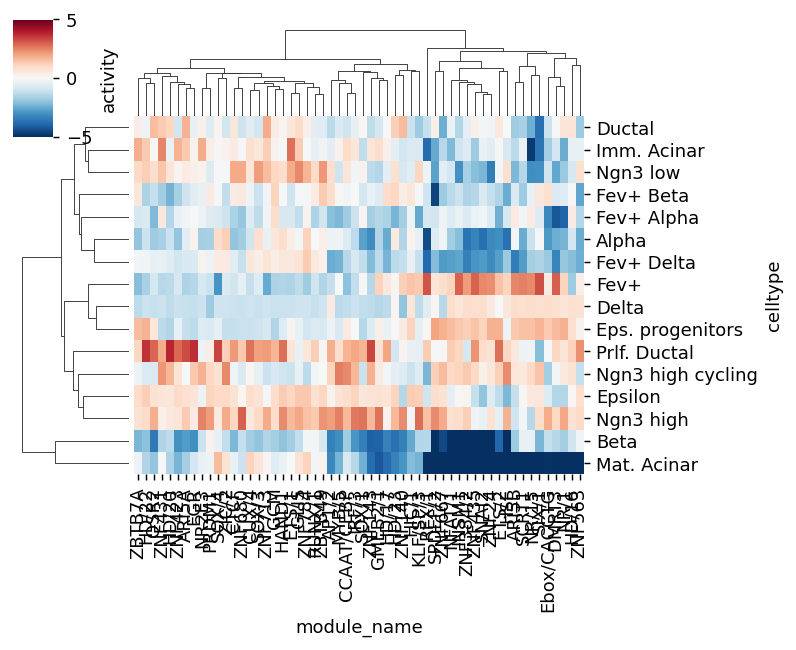

In [276]:
mod_names_best = set(rkg_df.sort_values("scores", ascending=False).groupby("celltype").head(5)["module_name"])
best = rkg_df[rkg_df["module_name"].isin(mod_names_best)]
rcParams["figure.dpi"] = 130
sns.clustermap(
    best.pivot(index="celltype", columns="module_name", values="scores"),
    cbar_kws={"label": "activity"},
    cmap="RdBu_r",
    vmin=-5,
    vmax=5,
    figsize=[6.2, 5],
    # dpi=100,
    xticklabels=True,
)

In [277]:
rna_tfs = rna_sel.to_df()[list(set(res["gene_name"]))]
rna_tfs["celltype"] = rna_sel.obs["celltype"]
mean_tfs = rna_tfs.groupby("celltype").mean()

act_tfs_df = ad_act.to_df()
act_tfs_df["celltype"] = ad_act.obs["celltype"]
mean_act_tf = act_tfs_df.groupby("celltype").mean()

In [278]:
corr_celltype = []
for i, c1 in enumerate(mean_act_tf):
    if i % 50 == 0:
        print(i, mean_act_tf.shape[1])
    for j, c2 in enumerate(mean_tfs):
        if not c1 in genes_by_module_name or not c2 in genes_by_module_name[c1]:
            continue
        a = mean_act_tf[c1]
        b = mean_tfs[c2]
        corr_celltype.append([c1, c2, mean_act_tf.index[np.argmax(mean_act_tf[c1])]] + list(pearsonr(a, b)))

corr = pd.DataFrame(corr_celltype, columns=["module_name", "gene_name", "cell_type", "pearsonr", "p_val"])
corr = corr.sort_values("pearsonr", ascending=False)

0 288
50 288
100 288
150 288
200 288
250 288


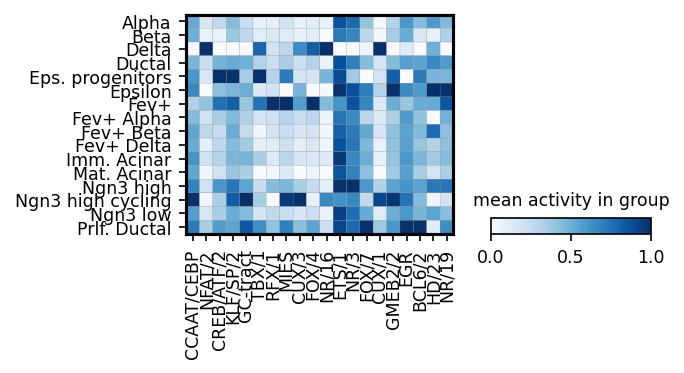

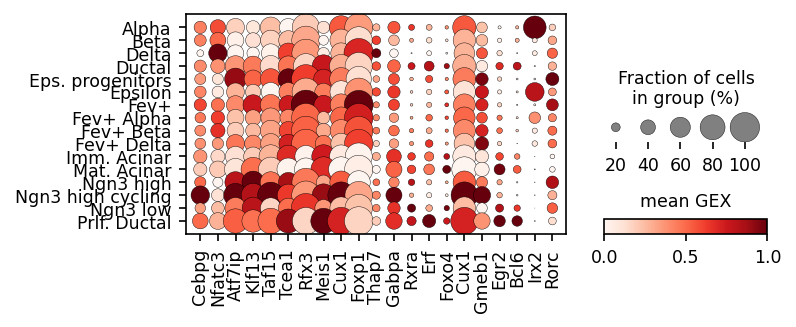

In [279]:
rcParams['figure.dpi'] = 150
# activators
module_names = corr[corr['pearsonr'] > 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['module_name'].drop_duplicates()
gene_names   = corr[corr['pearsonr'] > 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['gene_name']
sc.pl.matrixplot(ad_act,
            groupby=cell_type_key,
            cmap='Blues',
            show=False,
            var_names=module_names,
            figsize=[4, 1.9],
            standard_scale='var',
            colorbar_title='mean activity in group')

plt.savefig('../../../output/filter_activities_pancreatic_endocrinogenesis.pdf')
plt.show()

sc.pl.dotplot(rna_sel,
              groupby=cell_type_key,
              standard_scale='var',
              show=False,
              colorbar_title='mean GEX',
              var_names=gene_names,
              figsize=[5, 1.9])

plt.savefig('../../../output/gene_expression_pancreatic_endocrinogenesis.pdf')
plt.show()



In [280]:
module_names

165     CCAAT/CEBP
1467        NFAT/2
159     CREB/ATF/2
1505      KLF/SP/2
1558      GC-tract
467          TBX/1
1714         RFX/1
278           MIES
37           CUX/3
1366         FOX/4
110          NR/16
1453         ETS/1
67            NR/3
1621         FOX/7
34           CUX/1
1919       GMEB2/2
1530           EGR
1635        BCL6/2
1685         HD/23
131          NR/19
Name: module_name, dtype: object

In [281]:
module_names

165     CCAAT/CEBP
1467        NFAT/2
159     CREB/ATF/2
1505      KLF/SP/2
1558      GC-tract
467          TBX/1
1714         RFX/1
278           MIES
37           CUX/3
1366         FOX/4
110          NR/16
1453         ETS/1
67            NR/3
1621         FOX/7
34           CUX/1
1919       GMEB2/2
1530           EGR
1635        BCL6/2
1685         HD/23
131          NR/19
Name: module_name, dtype: object

In [282]:
module_names.map(res.set_index('module_name')['filter_id'].to_dict())

165      51
1467     98
159      49
1505    108
1558    112
467      69
1714    246
278      68
37       14
1366     78
110      44
1453     97
67       31
1621    163
34       13
1919    276
1530    110
1635    169
1685    203
131      47
Name: module_name, dtype: int64

In [283]:
module_names

165     CCAAT/CEBP
1467        NFAT/2
159     CREB/ATF/2
1505      KLF/SP/2
1558      GC-tract
467          TBX/1
1714         RFX/1
278           MIES
37           CUX/3
1366         FOX/4
110          NR/16
1453         ETS/1
67            NR/3
1621         FOX/7
34           CUX/1
1919       GMEB2/2
1530           EGR
1635        BCL6/2
1685         HD/23
131          NR/19
Name: module_name, dtype: object

In [284]:
anno[anno['Name'].str.contains('ETS')]

Cluster_ID   Name  DBD           Seed_motif  Total_width  Consensus_left  Consensus_right  Cluster_size Name_unique
36          98  ETS/1  ETS            EHF_ETS_1           25               7               17            71       ETS/1
37          96  ETS/2  ETS  EHF_HUMAN.H11MO.0.B           18               3               14            24       ETS/2

In [285]:
name_by_filter_id = meta["archetypes_name"].to_dict()
name_by_filter_id[1]

'HD/1'

In [286]:
test_names = list(anno.sort_values('Cluster_ID')['Name'])[:1]
print(test_names)

pd.Series(test_names).map(res.set_index('module_name')['filter_id'].to_dict())

['HD/1']


0   NaN
dtype: float64

In [287]:
filter_id_by_name = {v: k for k, v in zip(name_by_filter_id.keys(), name_by_filter_id.values())}

SOX/3


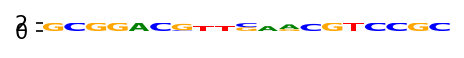

In [288]:
for k in list(anno.sort_values('Cluster_ID')['Name']):
    if k != 'SOX/3':
        continue
    print(k)
    mb.pl.logo(
        model,
        title=False,
        xticks=False,
        rowspan_dinuc=0,
        rowspan_mono=1,
        n_rows=40,
        log_odds=True,
        # stop_at=11,
        show=False,
        # n_rows=len(res.head(20).index),
        n_cols=1,
        order=pd.Series([k]).map(filter_id_by_name) + 2,
    )  # n_cols=len(reduced_groups))
    # plt.tight_layout()
    plt.show()

In [289]:
custom_names = pd.Series(['MYB/5', 'MYB/1', 'FOX/4', 'NR/20', 'TBX/1', 'ETS/1', 'YY1', 'STAT/1', 'NR/17', 'HD/14'])
# custom_names = pd.Series(['FOX/4',])
custom_names.map(res.set_index('module_name')['filter_id'].to_dict()),

(0    251
 1    252
 2     78
 3    247
 4     69
 5     97
 6    144
 7    166
 8     45
 9     18
 dtype: int64,)

0    251
1    252
2     78
3    247
4     69
5     97
6    144
7    166
8     45
9     18
dtype: int64


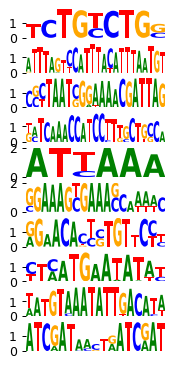

In [290]:
print(custom_names.map(res.set_index('module_name')['filter_id'].to_dict()))
mb.pl.set_rcParams({"figure.figsize": [2, 20], "figure.dpi": 90})
mb.pl.logo(
    model,
    title=False,
    xticks=False,
    rowspan_dinuc=0,
    rowspan_mono=1,
    n_rows=40,
    log_odds=True,
    # stop_at=11,
    show=False,
    # n_rows=len(res.head(20).index),
    n_cols=1,
    order=custom_names.map(filter_id_by_name) + 2,
)  # n_cols=len(reduced_groups))
# plt.tight_layout()

plt.savefig('../../../output/motif_pancreatic_endocrinogenesis_publication.pdf')
plt.show()


0    261
1     79
dtype: int64


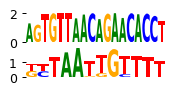

In [291]:
custom_names = pd.Series(['GLI', 'FOX/5'])

print(custom_names.map(res.set_index('module_name')['filter_id'].to_dict()))
mb.pl.set_rcParams({"figure.figsize": [2, 20], "figure.dpi": 90})
mb.pl.logo(
    model,
    title=False,
    xticks=False,
    rowspan_dinuc=0,
    rowspan_mono=1,
    n_rows=40,
    log_odds=True,
    # stop_at=11,
    show=False,
    # n_rows=len(res.head(20).index),
    n_cols=1,
    order=custom_names.map(filter_id_by_name) + 2,
)  # n_cols=len(reduced_groups))
# plt.tight_layout()

plt.savefig('../../../output/motif_pancreatic_neurogenesis_publication_subset.pdf')
plt.show()


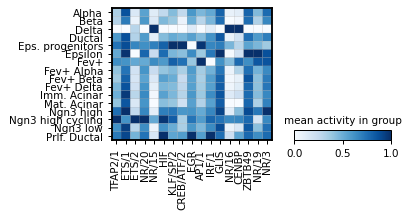

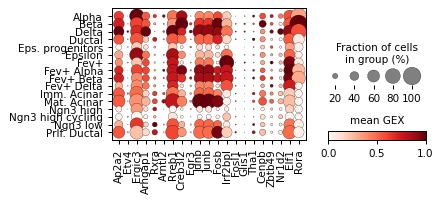

In [292]:
# repressors
module_names = corr[corr['pearsonr'] < 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['module_name'].drop_duplicates()
gene_names   = corr[corr['pearsonr'] < 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['gene_name']
sc.pl.matrixplot(ad_act,
            groupby=cell_type_key,
            cmap='Blues',
            var_names=module_names,
            figsize=[4, 1.9],
            standard_scale='var',
            colorbar_title='mean activity in group')
sc.pl.dotplot(rna_sel,
              groupby=cell_type_key,
              colorbar_title='mean GEX',
              standard_scale='var',
              var_names=gene_names,
              figsize=[4.5, 1.9])



In [293]:
# sc.pl.dotplot(rna_sel, groupby='celltype', var_names=list(set(res['gene_name'])))

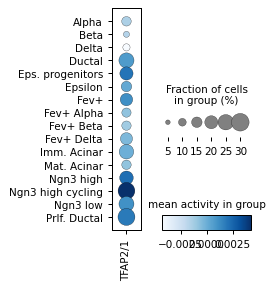

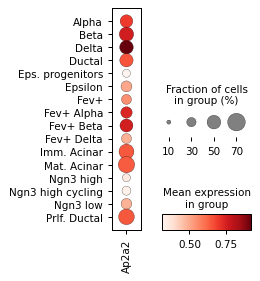

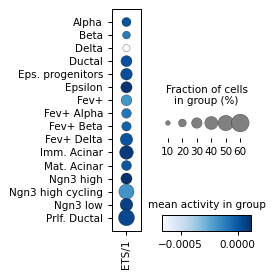

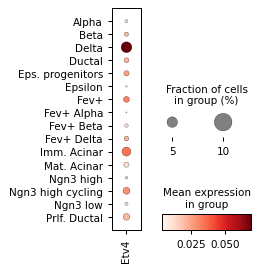

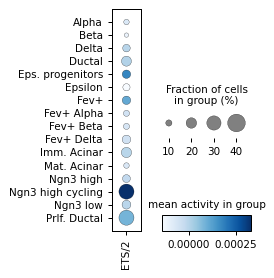

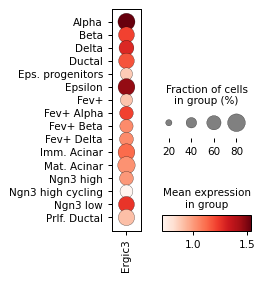

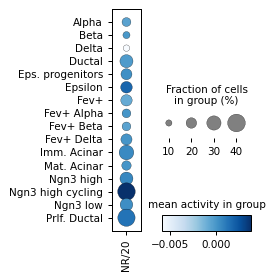

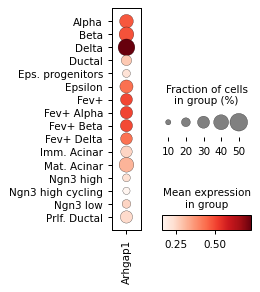

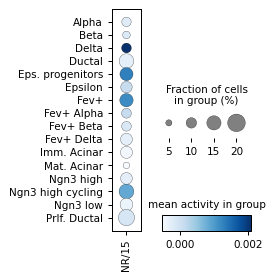

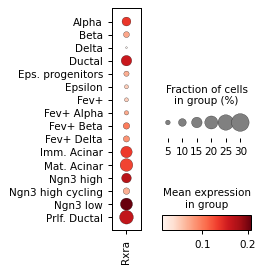

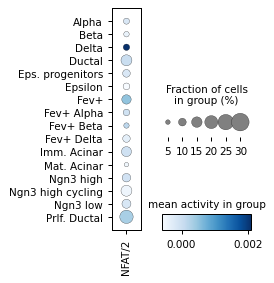

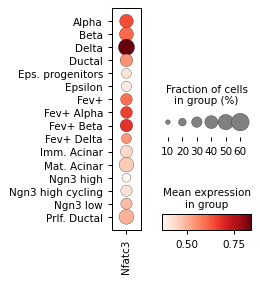

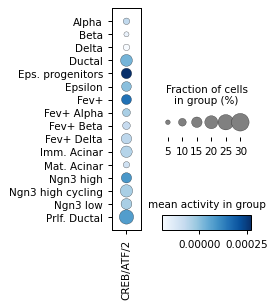

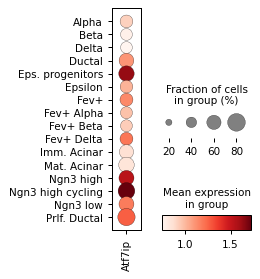

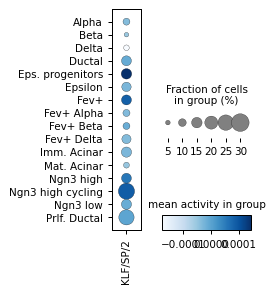

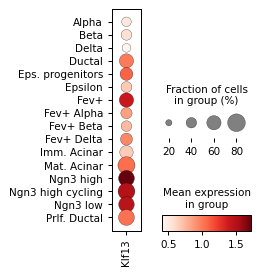

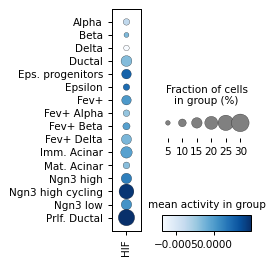

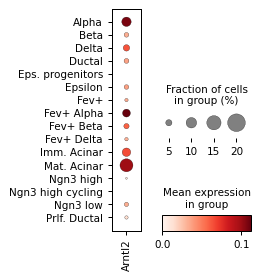

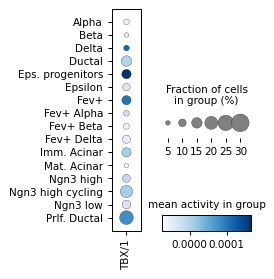

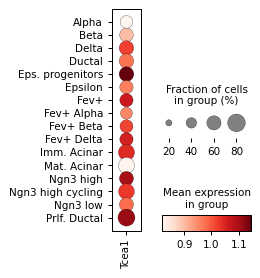

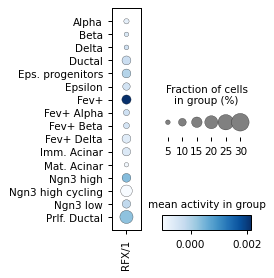

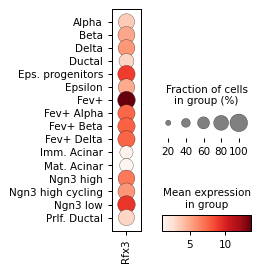

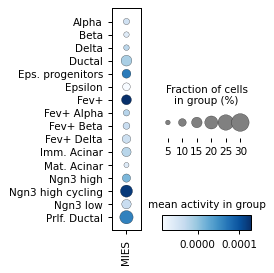

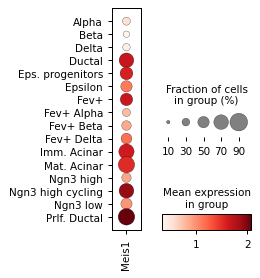

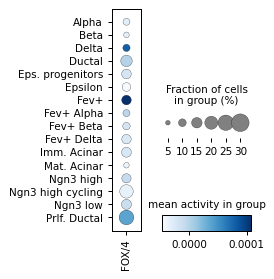

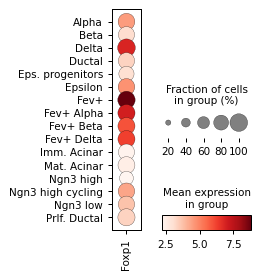

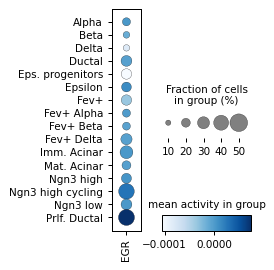

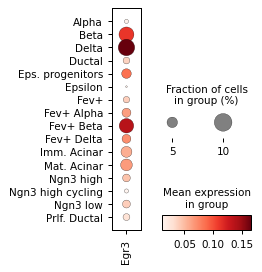

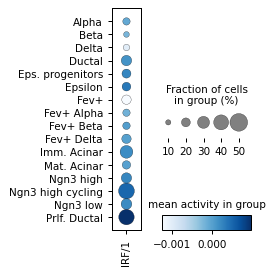

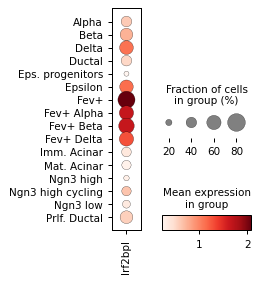

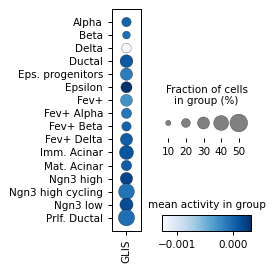

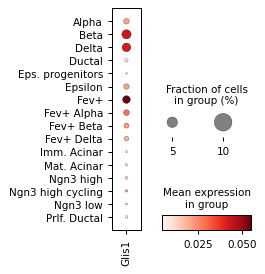

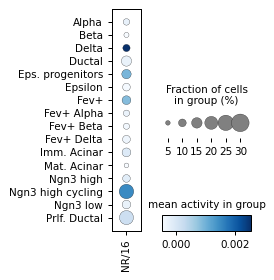

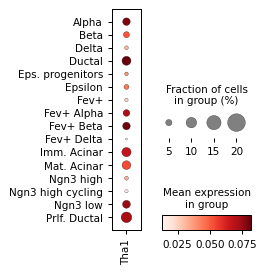

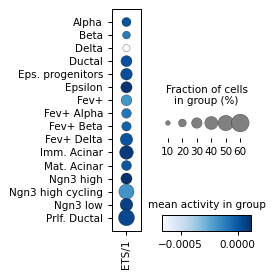

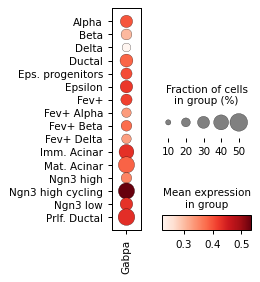

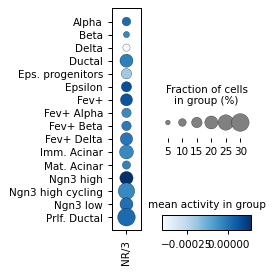

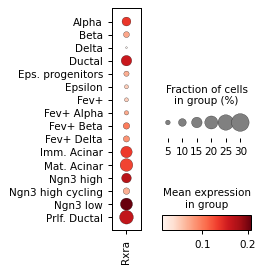

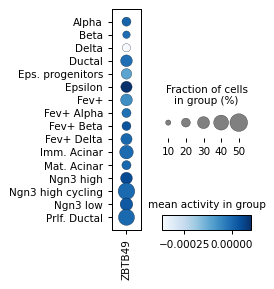

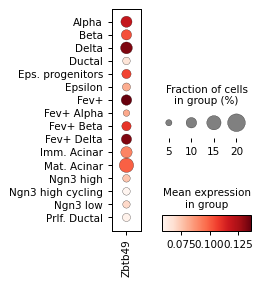

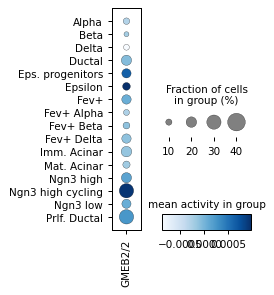

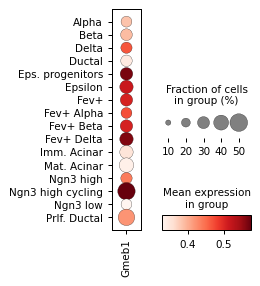

In [294]:
for ri, r in corr.sort_values("p_val").groupby("cell_type").head(3).iterrows():
    # ad_act.obs['HD/2'] = log_act['HD/2']
    sc.pl.dotplot(
        ad_act,
        groupby="celltype",
        cmap="Blues",
        var_names=r["module_name"],
        figsize=[2, 3.2],
        colorbar_title="mean activity in group",
    )
    sc.pl.dotplot(rna_sel, groupby="celltype", var_names=r["gene_name"], figsize=[2, 3.2])

## Filter activities versus graph activities

In [295]:
A = model.get_log_activities()
sum_A = A.abs().sum(axis=1).cpu().detach().numpy()
A = A.squeeze(0)
print(A.shape)

torch.Size([288, 8161])


In [296]:
# this function assesses the contributions of A on the graph
indices, contributions, max_eig = mb.tl.compute_contributions(A.cpu(), C.cpu(),  D.cpu())

contributions_normalized = torch.abs(contributions) / max_eig
contributions_df = pd.DataFrame(contributions_normalized.detach(), columns=["index"])
print("Summary statistics of the normalized contributions: \n")
contributions_df.describe()

Summary statistics of the normalized contributions: 



index
count  288.000000
mean     0.377669
std      0.044241
min      0.277877
25%      0.344784
50%      0.377112
75%      0.407361
max      0.496438

Percentage of non-zero entries of the filter matrix A: 100.0 %


<Figure size 1000x500 with 0 Axes>

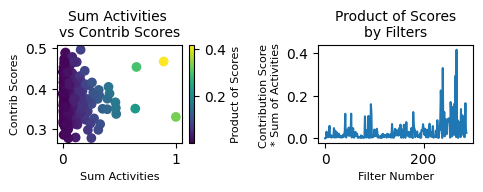

In [297]:
from matplotlib.pyplot import rcParams

rcParams["figure.dpi"] = 100
plt.figure(figsize=(10, 5))

print(f"Percentage of non-zero entries of the filter matrix A: {100 * torch.sum(A != 0).item() / A.numel()} %")

mb.pl.filter_contrib_simple(contributions_normalized, A.cpu())

In [298]:
# normalize the data, and look at summary stats
sum_A_norm = sum_A / np.max(sum_A)
sum_A_df = pd.DataFrame(sum_A.T, columns=["sum_A"])
sum_A_df.describe()

sum_A
count  288.000000
mean     5.957136
std      8.597739
min      0.000547
25%      1.099398
50%      2.910393
75%      7.284939
max     68.284973

In [299]:
contrib_arr = contributions_normalized.unsqueeze(dim=0).detach().numpy()
sum_A = A.cpu().abs().sum(axis=1).detach().numpy()
contrib = contrib_arr[0]

contrib_times_activities = contrib * sum_A
contrib_times_activities_norm = contrib_times_activities / np.max(contrib_times_activities)
contrib_times_activities_df = pd.DataFrame(contrib_times_activities, columns=["contribution_times_activities"])
contrib_times_activities_df.describe()

contribution_times_activities
count                     288.000000
mean                        2.240532
std                         3.305929
min                         0.000212
25%                         0.422305
50%                         1.031060
75%                         2.731771
max                        28.479584

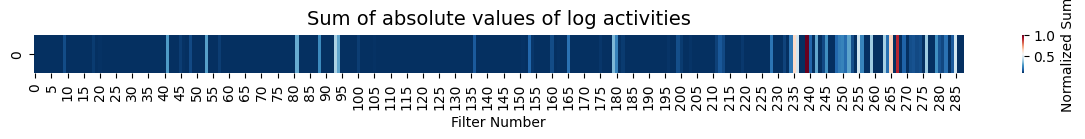

In [300]:
sum_A = A.cpu().abs().sum(axis=1)
sum_A_normalized = sum_A / sum_A.max()
mb.pl.filter_contrib_heatmap(sum_A_normalized, title='Sum of absolute values of log activities', score="Normalized Sum")

In [301]:
# this function assesses the contributions of A on the graph
indices, contributions, max_singular_value = mb.tl.compute_contributions(A.cpu(), C.cpu(), D.cpu(), use_hadamard=False)
contributions_normalized = torch.abs(contributions) / max_singular_value

(array([  9,  18,  20,  41,  45,  46,  48,  53,  57,  81,  88,  93,  94,
       100, 105, 136, 150, 151, 153, 154, 160, 162, 165, 175, 179, 180,
       181, 182, 196, 199, 200, 203, 211, 212, 213, 219, 228, 232, 233,
       234, 235, 236, 239, 240, 242, 244, 245, 248, 249, 250, 251, 252,
       253, 255, 256, 259, 263, 264, 265, 267, 269, 271, 272, 273, 274,
       276, 279, 280, 281, 282, 284, 285]),)
[136, 160, 162, 181, 199, 212, 219, 228, 234, 248, 255, 256, 259, 263, 265, 267, 269, 271, 279, 281]
tensor(0.25)


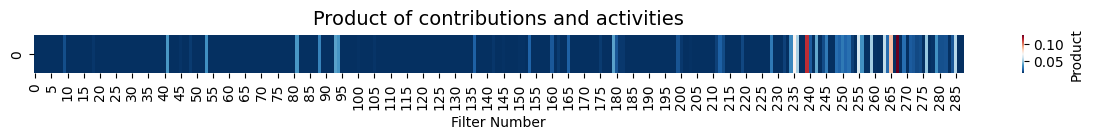

In [302]:
contrib_np = contributions_normalized.detach().numpy()
sum_A_np = sum_A_normalized.detach().numpy()
rel_idcC = np.where(contrib_np >= np.percentile(contrib_np, 75))
rel_idcA = np.where(sum_A_np >= np.percentile(sum_A_np, 75))
print(rel_idcA)
print([x for x in rel_idcC[0] if x in rel_idcA[0]])

contrib_activites_prod = contributions_normalized * sum_A_normalized
print(sum(contrib_activites_prod >= np.sort(contrib_activites_prod.detach().numpy())[3*len(contrib_activites_prod) // 4])/len(contrib_activites_prod))
mb.pl.filter_contrib_heatmap(contrib_activites_prod, title="Product of contributions and activities", score="Product")

Percentage of non-zero entries of the filter matrix A: 100.0 %


<Figure size 1000x500 with 0 Axes>

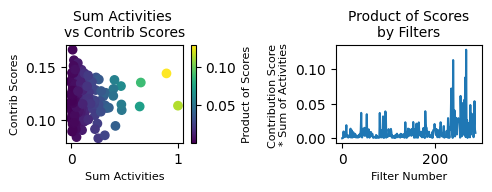

In [303]:
from matplotlib.pyplot import rcParams
rcParams['figure.dpi'] = 100
plt.figure(figsize=(10, 5))


print(f"Percentage of non-zero entries of the filter matrix A: {100 * torch.sum(A != 0).item() / A.numel()} %")

mb.pl.filter_contrib_simple(contributions_normalized, A.cpu(), 'filter_contrib_plot.pdf')

plt.savefig('../../../output/contrib_scores_graph_pancreatic_endocrinogenesis.pdf')

In [304]:
print('here...')

here...


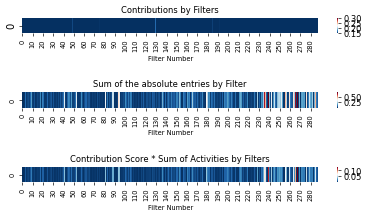

In [305]:

from matplotlib.pyplot import rcParams
rcParams['figure.dpi'] = 60

mb.pl.contrib_heatmaps(A.cpu(), C.cpu(), D.cpu(), use_hadamard=False, save_pdf=True)

In [306]:
anno[anno['Name'] == 'TFAP2/1']

Cluster_ID     Name   DBD            Seed_motif  Total_width  Consensus_left  Consensus_right  Cluster_size Name_unique
215         264  TFAP2/1  TFAP  AP2A_HUMAN.H11MO.0.A           15               3               12            24     TFAP2/1

In [307]:
# grnpedia associations
ttrust = pd.read_csv('https://www.grnpedia.org/trrust/data/trrust_rawdata.mouse.tsv',
                     sep='\t',
                     header=None)
ttrust.columns = ['tf', 'target', 'role', 'ref']
ttrust = ttrust.groupby(['tf', 'role']).size().reset_index().pivot(index='tf', columns='role', values=0).fillna(0)
ttrust['consensus'] = np.where((ttrust['Activation'] > 0) & (ttrust['Repression'] == 0), 'red',
                               np.where((ttrust['Repression'] > 0) & (ttrust['Activation'] == 0), 'blue', 'purple'))

In [308]:
res[res['module_name'] == 'SOX/3']

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman         p_val module_name         p_adj         k
1403         91            False            92     Sox13     True -0.019356  8.037954e-02       SOX/3  1.974952e-01  Sox13_92
1404         91            False            92      Sox8     True  0.013017  2.396776e-01       SOX/3  4.317106e-01   Sox8_92
1405         91            False            92     Sox10     True  0.004463  6.868651e-01       SOX/3  8.237248e-01  Sox10_92
1406         91            False            92     Sox12     True  0.004646  6.747168e-01       SOX/3  8.159169e-01  Sox12_92
1407         91            False            92     Sox30     True  0.022332  4.365840e-02       SOX/3  1.264612e-01  Sox30_92
1408         91            False            92      Sox9     True  0.112574  1.970287e-24       SOX/3  1.311260e-22   Sox9_92
1409         91            False            92     Sox11     True -0.000002  9.998756e-01       SOX/3  9.998756e-01  Sox11_92
3333         91             True            92     Sox13     True -0.003547  7.486992e-01       SOX/3  8.619085e-01  Sox13_92
3334         91             True            92      Sox8     True  0.002815  7.992993e-01       SOX/3  8.881103e-01   Sox8_92
3335         91             True            92     Sox10     True  0.011439  3.014702e-01       SOX/3  5.088216e-01  Sox10_92
3336         91             True            92     Sox12     True -0.023356  3.486919e-02       SOX/3  1.065360e-01  Sox12_92
3337         91             True            92     Sox30     True -0.003407  7.582867e-01       SOX/3  8.665619e-01  Sox30_92
3338         91             True            92      Sox9     True  0.037916  6.127002e-04       SOX/3  3.724445e-03   Sox9_92
3339         91             True            92     Sox11     True  0.024678  2.578970e-02       SOX/3  8.429149e-02  Sox11_92

In [309]:
# res_sel[res_sel['module_name'] == 'SOX/3']

In [310]:
from matplotlib.pyplot import rcParams
rcParams['figure.dpi'] = 80

# unsqueeze the data to make it compatible with the heatmap function
sum_A_norm = sum_A_norm.reshape(1,-1)
contrib_times_activities = contrib_times_activities.reshape(1,-1)

In [311]:
rcParams['figure.figsize'] = 3, 3
rcParams['figure.dpi'] = 135
rcParams['pdf.fonttype'] = 42
from adjustText import adjust_text

def delta_models(model_by_logdynamic):
    model = model_by_logdynamic[True]
    log_act1 = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act1 = pd.DataFrame(log_act1.detach().cpu().numpy())

    model = model_by_logdynamic[False]
    log_act2 = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act2 = pd.DataFrame(log_act2.detach().cpu().numpy())

    d = log_act1.mean(axis=0) - log_act2.mean(axis=0)
    # d.index = ad.obs_names
    return d

# graph = True - graph = False
delta_model = delta_models(model_by_logdynamic)
delta_model
delta_model = delta_model[2:]
delta_model.index = range(len(delta_model))
delta_model.index += 1
delta_model.index = delta_model.index.map(name_by_filter_id)
delta_model

res['act_change'] = res['module_name'].map(delta_model.to_dict())
res['k'] = res['module_name'] + ':' + res['gene_name']
res['graph_score'] = res['filter_id'].map({i : contrib_times_activities[0][i + 2] for i in range(len(contrib_times_activities[0]) - 2)})
res['z'] = np.sqrt((res['graph_score'] ** 2) * (-np.log(res['p_adj'] + 1e-10)) ** 2)


In [329]:
# only show weights with Graph Layer on
res_sel = res.copy() # [res['opt_log_dynamic']]


In [330]:
res.shape, res_sel.shape

((3860, 13), (3860, 13))

PROX1:Prox1 (0.10152458964483024, 0.02648635553488446) 0.16746491193771362 purple
CCAAT/CEBP:Dbpht2 (0.08380329638181025, -0.10216006562887048) 0.10485882312059402 gray
MYB/2:Mybl1 (0.07243103533105802, 0.050591974832622455) 0.12227752804756165 purple
GLI:Zbtb7c (0.06540272409469475, -0.06202664807535716) 0.09551192820072174 gray
NR/11:Nr5a2 (0.0633659473762815, 0.0378831330291286) 0.21196624636650085 red
TFAP2/1:Ap2a1 (0.060519831531207734, -0.016983829522491854) 0.15999287366867065 gray
SOX/3:Sox9 (0.056436817206057345, 0.038712442280068114) 0.1335025131702423 purple
GRHL:Grhl2 (0.03849174864696441, 0.046998026771386245) 0.08097979426383972 gray
SOX/4:Sox4 (0.030015786183378995, 0.041978308057303786) 0.08338265866041183 purple
FOX/5:Foxo1 (0.029284392319721256, -0.05668413796854764) 0.07688487321138382 purple


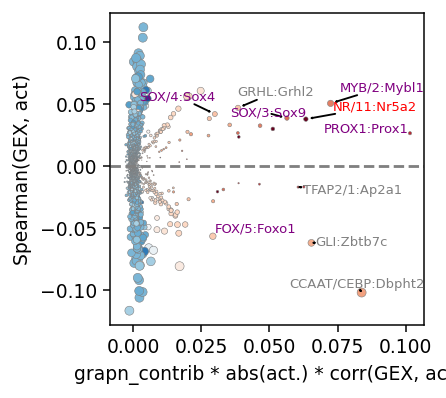

In [334]:


ax = plt.subplot()
cmap = sns.color_palette('RdBu_r', as_cmap=True)


res_sel = res_sel.sort_values('z', ascending=False) # .drop_duplicates('module_name')
# res_sel = res_sel.drop_duplicates('module_name')

# res_sel['x'] = np.log((res_sel['graph_score'] + 1) * (res_sel['act_change'].abs() + 1))
res_sel['x'] = res_sel['graph_score'] * res_sel['act_change'].abs() * res_sel['spearman'].abs()
# res_sel['x'] = res_sel['act_change'].abs() * res_sel['spearman'].abs()

# general noise stacking of cells on x-y axes
sigma = 0.001
mu =0.00
# generate normally distributed samples
noise = sigma * np.random.randn(res_sel.shape[0]) + mu
res_sel['x'] = res_sel['x'] + noise
res_sel['spearman'] = res_sel['spearman'] + noise


edgecolors = res_sel['gene_name'].map(ttrust['consensus'].to_dict())
edgecolors = np.where(~pd.isnull(edgecolors), edgecolors, 'gray')
res_sel['edgecolors'] = edgecolors

for show_log_dynamic in [True,]:
    res_plot = res_sel[res_sel['opt_log_dynamic'] == show_log_dynamic]
    plt.scatter(res_plot['x'],            
                res_plot['spearman'],
                s=-np.log(res_plot['p_adj'] + 1e-10),
                cmap=cmap,
                lw=.3,
                marker='o' if show_log_dynamic else '^',
                edgecolors='gray',
                c=res_plot['act_change'])

    plt.axhline(y=0, ls='--', c='gray')
    plt.xlabel('grapn_contrib * abs(act.) * corr(GEX, act)')
    plt.ylabel('Spearman(GEX, act)')


    res_plot = res_plot.sort_values('x', ascending=False).drop_duplicates('module_name')
    texts = [] # [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]

    for ri, r in res_plot.head(10).iterrows():
        print(r['module_name'] + ':' + r['gene_name'], (r['x'], r['spearman']), r['act_change'], r['edgecolors'])
        t = ax.annotate(r['module_name'] + ':' + r['gene_name'], (r['x'], r['spearman']), fontsize=7, color=r['edgecolors'])
        texts.append(t)
    adjust_text(texts, arrowprops=dict(arrowstyle='->'))

plt.savefig('../../../output/graph_contribution_pancreatic_endocrinogesis.pdf')
plt.show()

order 0    91
1    39
2    51
dtype: int64
0 out of 288...


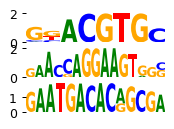

In [ ]:
mb.pl.set_rcParams({"figure.figsize": [2, 20], "figure.dpi": 90})
mb.pl.logo(
    model,
    log_odds=True,
    title=False,
    xticks=False,
    rowspan_dinuc=0,
    rowspan_mono=1,
    n_rows=40,
    # stop_at=11,
    show=False,
    # n_rows=len(res.head(20).index),
    n_cols=1,
    order=pd.Series(['SOX/3', 'NR/11', 'CCAAT/CEBP']).map(res.set_index('module_name')['filter_id'].to_dict()),
)  # n_cols=len(reduced_groups))
# plt.tight_layout()

plt.savefig('../../../output/motif_pancreatic_endocrinogenesis.pdf')
plt.show()


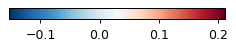

In [ ]:
import pylab as pl
import numpy as np

a = np.array([[res_sel['act_change'].min(), res_sel['act_change'].max()]])
pl.figure(figsize=(3, .2))
img = pl.imshow(a, cmap="RdBu_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
pl.savefig("../../../output/graph_contribution_pancreatic_endocrinogenesis_cbar.pdf")

In [ ]:
scv.tl.velocity_pseudotime(rna)
# scv.pl.scatter(rna, color="velocity_pseudotime", color_map="gnuplot")

computing terminal states
    identified 9 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


In [ ]:
def running_mean(y_in, x_in, N_out=101, sigma=.05):
    '''
    Returns running mean as a Bell-curve weighted average at evenly spaced
    points. Does NOT wrap signal around, or pad with zeros.
    
    Arguments:
    y_in -- y values, the values to be smoothed and re-sampled
    x_in -- x values for array
    
    Keyword arguments:
    N_out -- NoOf elements in resampled array.
    sigma -- 'Width' of Bell-curve in units of param x .
    '''
    import numpy as np
    N_in = len(y_in)

    # Gaussian kernel
    x_out = np.linspace(np.min(x_in), np.max(x_in), N_out)
    x_in_mesh, x_out_mesh = np.meshgrid(x_in, x_out)
    gauss_kernel = np.exp(-np.square(x_in_mesh - x_out_mesh) / (2 * sigma**2))
    # Normalize kernel, such that the sum is one along axis 1
    normalization = np.tile(np.reshape(np.sum(gauss_kernel, axis=1), (N_out, 1)), (1, N_in))
    gauss_kernel_normalized = gauss_kernel / normalization
    # Perform running average as a linear operation
    y_out = gauss_kernel_normalized @ y_in

    return y_out, x_out

In [ ]:
# prepare velocity pseudotime values for visualization
atac.obs['velocity_pseudotime'] = rna.obs['velocity_pseudotime'].values
ad.obs['velocity_pseudotime'] = atac.obs['velocity_pseudotime']

### Given a few potential genes, verify its association with chromatin targets

In [ ]:
def plot_pseudotime(gene_name, filter_name, sigma_gex=.05, sigma_filter=.1, save=None):
    rcParams['figure.figsize'] = 3, 2
    gene_key = gene_name
    x = rna.obs['velocity_pseudotime']
    y = rna[:,rna.var_names==gene_key].X.A.flatten()
    y = np.log(y)
    y[y == -np.inf] = np.nanmin(y[y != -np.inf])

    y_mean, x_mean = running_mean(y, x, sigma=sigma_gex)
    plt.scatter(x, y, edgecolors=None, color='lightgreen', s=.1)
    plt.plot(x_mean, y_mean, color='green')
    plt.ylabel('')
    plt.title(gene_key)
    plt.ylabel('gene expression [log]')
    plt.xlabel('pseudotime')


    x = ad.obs['velocity_pseudotime']

    if save is not None:
        plt.savefig(save + '_gex.pdf')
    plt.show()
    filter_id = int(res[res['module_name'].str.contains(filter_name)]['filter_id'].values[0])

    y= act.T.numpy()[:,filter_id]
    # y = np.abs(y)
    # y = np.log(y)
    # y[y == -np.inf] = np.nanmin(y[y != -np.inf])

    y_mean, x_mean = running_mean(y, x, sigma=sigma_filter)
    # plt.scatter(x, y, edgecolors='black', color='lightgreen', s=.1)
    plt.plot(x_mean, y_mean, color='red')
    plt.ylabel('')
    plt.title('filter activities %s' % filter_name)
    plt.ylabel('filter activity')
    plt.xlabel('pseudotime')

    if save is not None:
        plt.savefig(save + '_filter.pdf')

    # plt.close()
    plt.show()


In [ ]:
# plot_pseudotime('Foxa2', 'FOXA/1', sigma_gex=.01, sigma_filter=.1,
#                 save="../../../output/pancreas_mafa_bzip")


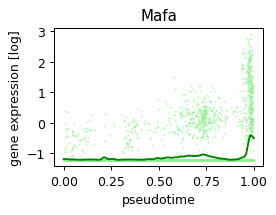

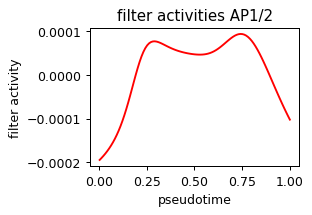

In [ ]:
plot_pseudotime('Mafa', 'AP1/2', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_mafa_bzip")


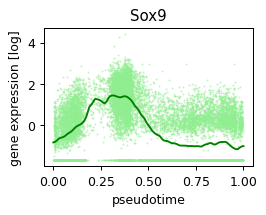

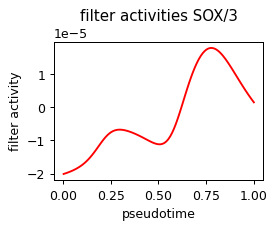

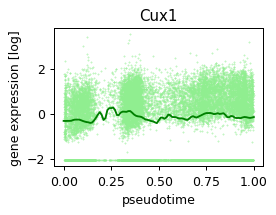

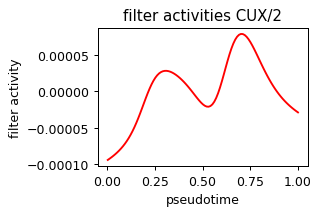

In [ ]:
plt.rcParams["font.family"] = 'sans-serif' # None # "Arial"

plot_pseudotime('Sox9', 'SOX/3', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_sox9_sox3")

plot_pseudotime('Cux1', 'CUX/2', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_cux1_cux2")

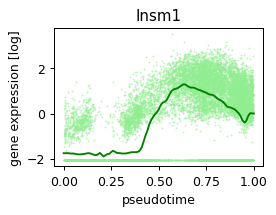

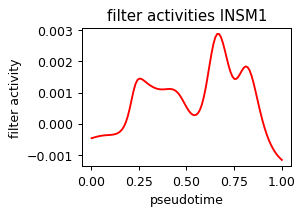

In [ ]:
plot_pseudotime('Insm1', 'INSM1', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

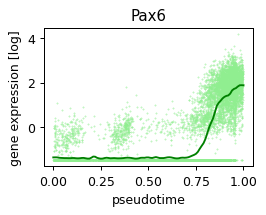

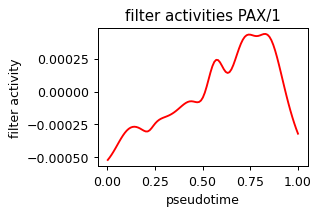

In [ ]:
plot_pseudotime('Pax6', 'PAX/1', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

In [ ]:
res

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman         p_val   module_name         p_adj                  k  act_change  graph_score           z
0             1            False             2     Shox2     True -0.010681  3.346320e-01          HD/2  5.440941e-01         HD/2:Shox2   -0.033147     2.135978    1.300027
1             1            False             2      Gbx1     True -0.005512  6.186044e-01          HD/2  7.824332e-01          HD/2:Gbx1   -0.033147     2.135978    0.524055
2             1            False             2      Pdx1     True  0.032841  3.006220e-03          HD/2  1.455961e-02          HD/2:Pdx1   -0.033147     2.135978    9.034129
3             1            False             2       Arx     True  0.009255  4.031489e-01          HD/2  6.100175e-01           HD/2:Arx   -0.033147     2.135978    1.055745
4             1            False             2    Arxes2     True -0.006027  5.862010e-01          HD/2  7.610262e-01        HD/2:Arxes2   -0.033147     2.135978    0.583309
...         ...              ...           ...       ...      ...       ...           ...           ...           ...                ...         ...          ...         ...
3855        280             True           281      Pax2     True  0.013350  2.278529e-01         PAX/1  4.174240e-01         PAX/1:Pax2    0.045139     4.515211    3.944726
3856        280             True           281      Pax6     True -0.080454  3.368429e-13         PAX/1  9.490611e-12         PAX/1:Pax6    0.045139     4.515211  103.557179
3857        282             True           283      Pax2     True -0.003662  7.408379e-01  PAX-halfsite  8.568437e-01  PAX-halfsite:Pax2    0.024079     4.426383    0.683875
3858        283             True           284       Ahr     True  0.023966  3.038693e-02           AHR  9.556552e-02            AHR:Ahr    0.099753    11.301619   26.535559
3859        284             True           285      Klf8     True -0.019348  8.050853e-02      KLF/SP/3  1.976863e-01      KLF/SP/3:Klf8   -0.028565     2.733049    4.430474

[3860 rows x 13 columns]

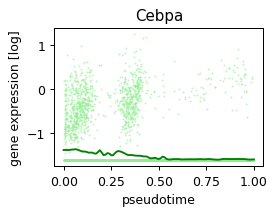

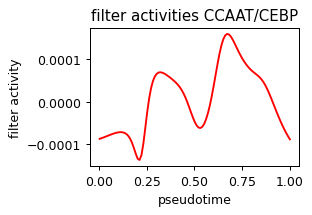

In [ ]:
plot_pseudotime('Cebpa', 'CCAAT/CEBP', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

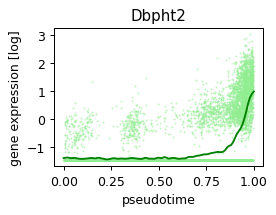

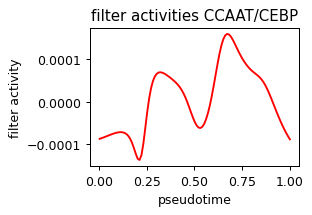

In [ ]:
plot_pseudotime('Dbpht2', 'CCAAT/CEBP', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

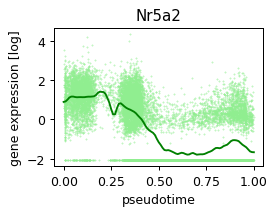

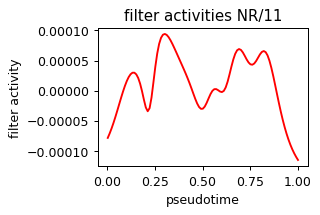

In [ ]:
plot_pseudotime('Nr5a2', 'NR/11', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_nr5a2_nr11")

In [ ]:
def plot_chromatin(filter_name, sigma_chrom,
                   group_key=None, key_sel=None,
                   q_thr=.95, show=True, save=None):
    res_sel = res[res['module_name'].str.contains(filter_name)]['filter_id']
    if res_sel.shape[0] == 0:
        print('not found')
        return None
    filter_id = int(res_sel.values[0])
    print(filter_id)
    scores = binding_per_mode[:,filter_id]
    # filter scores across regions
    # plt.hist(scores)

    if group_key is not None and key_sel is not None:
        ad_sel = ad[ad.obs[group_key] == key_sel]
    else:
        ad_sel = ad
    print('here')

    var_idx = np.argwhere(scores >= np.quantile(scores, q_thr)).flatten()
    var_names = ad_sel.var_names[var_idx]
    print(q_thr, var_names.shape)
    # background with all peaks
    var_names_neg = ad_sel.var_names[~ad.var_names.isin(var_names)]
    
    x = ad_sel.obs['velocity_pseudotime']
    y = ad_sel[:,var_names].X.mean(axis=1).A.flatten()
    # y = np.log(y)
    # y[y == -np.inf] = np.nanmin(y[y != -np.inf])
    y_mean, x_mean = running_mean(y, x, sigma=sigma_chrom)
    plt.scatter(x, y, edgecolors=None, color='lightblue', s=.1)
    plt.plot(x_mean, y_mean, color='blue', label='targets')
    plt.ylabel('')
    plt.title(filter_name + ((', %s' % key_sel) if key_sel is not None else ''))
    plt.ylabel('chromatin accessibility [mean]')
    plt.xlabel('pseudotime')
    # plt.show()

    print(q_thr, var_names_neg.shape)
    x = ad_sel.obs['velocity_pseudotime']
    y = ad_sel[:,var_names_neg].X.mean(axis=1).A.flatten()
    # y = np.log(y)
    # y[y == -np.inf] = np.nanmin(y[y != -np.inf])
    y_mean_avr, x_mean = running_mean(y, x, sigma=sigma_chrom)
    # plt.scatter(x, y, edgecolors=None, color='lightblue', s=.1)
    plt.plot(x_mean, y_mean_avr, color='gray', linestyle='--', label='non-targets')
    plt.ylabel('')
    plt.ylabel('chromatin accessibility [mean]')
    plt.xlabel('pseudotime')
    plt.legend()

    if save is not None:
        plt.savefig(save + '_filter.pdf')
    if not show:
        plt.close()
    else:
        plt.show()
    return (y_mean - y_mean_avr).sum()



In [ ]:
# sigma_chrom = .03
# plot_chromatin('INSM1', sigma_chrom, group_key='celltype',
#                # key_sel='Beta',
#                q_thr=.86, show=True, save=None)

In [ ]:
plot_chromatin('AP1/2', sigma_chrom, group_key='celltype',
               # key_sel='Beta',
               q_thr=.84, show=True, save=None)

NameError: name 'sigma_chrom' is not defined

52
here
0.84 (1354,)
0.84 (7105,)


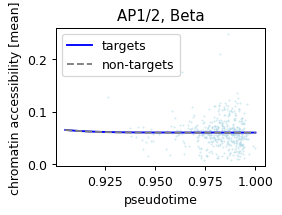

0.018939514728948684

In [ ]:
plot_chromatin('AP1/2', sigma_chrom, group_key='celltype', key_sel='Beta', q_thr=.84, show=True, save=None)

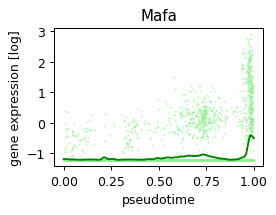

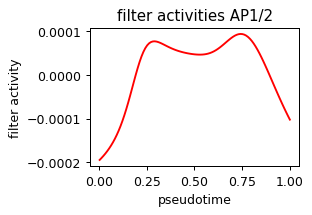

In [ ]:
plot_pseudotime('Mafa', 'AP1/2', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_mafa_bzip")


In [ ]:
plot_chromatin('AP1/2', sigma_chrom, groupby='celltype', q_thr=.95, show=True, save='../../../output/pancreas_ap1_1')

NameError: name 'sigma_chrom' is not defined

In [ ]:
rcParams['figure.figsize'] = 3, 2
plot_chromatin('SOX/3', sigma_chrom, q_thr=.83, show=True, save='../../../output/pancreas_sox3')

NameError: name 'sigma_chrom' is not defined

In [ ]:
# plt.close()
plot_chromatin('NR/11', sigma_chrom, q_thr=.9, show=True, save='../../../output/pancreas_nr11')
plot_chromatin('CCAAT/CEBP', sigma_chrom, q_thr=.9, show=True, save='../../../output/pancreas_ccaat')

NameError: name 'sigma_chrom' is not defined

In [ ]:
anno[anno['Name'] == 'CCAAT/CEBP']

Cluster_ID        Name   DBD             Seed_motif  Total_width  \
9          52  CCAAT/CEBP  bZIP  CEBPA_HUMAN.H11MO.0.A           14   

   Consensus_left  Consensus_right  Cluster_size Name_unique  
9               2               11            37  CCAAT/CEBP

247
0.9 (720,)
0.9 (6480,)


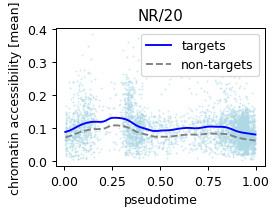

2.0238069901541995

In [ ]:
plot_chromatin('NR/20', sigma_chrom, q_thr=.9, show=True, save='../../../output/pancreas_ccaat')

115
here
0.99 (85,)
0.99 (8374,)
PRDM5 7.739109230395667
34
here
0.99 (85,)
0.99 (8374,)
NR/6 2.5702890598572274
90
here
0.99 (85,)
0.99 (8374,)
SOX/2 -0.19376635174106605
57
here
0.99 (85,)
0.99 (8374,)
Ebox/CACGTG/1 -1.644804906107861
231
here
0.99 (85,)
0.99 (8374,)
ZNF652 -3.1872782306461103
79
here
0.99 (85,)
0.99 (8374,)
FOX/5 -1.2295447493737894
84
here
0.99 (85,)
0.99 (8374,)
POU/1 -0.18686964602931283
35
here
0.99 (85,)
0.99 (8374,)
NR/7 0.40082416956229977
260
here
0.99 (85,)
0.99 (8374,)
GLIS 2.2852427382177622
237
here
0.99 (85,)
0.99 (8374,)
PROX1 -0.6228121758265364
180
here
0.99 (85,)
0.99 (8374,)
GFI -3.528772594239523
241
here
0.99 (85,)
0.99 (8374,)
GATA -1.7356401118158986
40
here
0.99 (85,)
0.99 (8374,)
NR/12 3.7543700525048376
43
here
0.99 (85,)
0.99 (8374,)
NR/15 0.026541675181111002
195
here
0.99 (85,)
0.99 (8374,)
IRF/4 4.040761962171464
184
here
0.99 (85,)
0.99 (8374,)
HLTF -0.8222119349106142
276
here
0.99 (85,)
0.99 (8374,)
GMEB2/2 3.963050832521875
23
here
0

KeyboardInterrupt: 

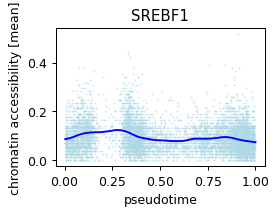

In [ ]:
module_names = set(res['module_name'])

diff_pseudotime_by_module = []
for name in module_names:
    sigma_chrom = .03
    diff = plot_chromatin(name, sigma_chrom, q_thr=.99, show=False)
    diff_pseudotime_by_module.append([name, diff])
    print(name, diff)
# filter_name = 'SOX/4'
# sigma_chrom = .03
# plot_chromatin(filter_name, sigma_chrom, q_thr=.9)

# filter_name = 'SOX/3'
# sigma_chrom = .03
# plot_chromatin(filter_name, sigma_chrom, q_thr=.84)

# filter_name = 'NR/11'
# sigma_chrom = .02
# plot_chromatin(filter_name, sigma_chrom, q_thr=.95)

# filter_name = 'PAX/1'
# sigma_chrom = .03
# plot_chromatin(filter_name, sigma_chrom, q_thr=.99)
chrom = pd.DataFrame(diff_pseudotime_by_module, columns=['module', 'diff'])

In [ ]:
chrom.sort_values('diff', ascending=False)

module      diff
176       RUNX/1  8.382294
86         THAP1  8.134047
140  Ebox/CATATG  8.051069
30         SIX/1  7.763655
70          NR/8  7.020761
..           ...       ...
149          SRF -4.402584
27           EGR -4.417582
4          ETS/1 -4.855597
20     OCT4+SOX2       NaN
37   DDIT3+CEBPA       NaN

[182 rows x 2 columns]

91
0.7 (2160,)
0.7 (5040,)


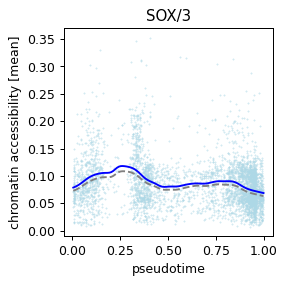

39
0.9 (720,)
0.9 (6480,)


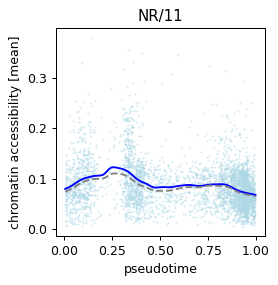

0.5901204762948825

39
0.9 (720,)
0.9 (6480,)


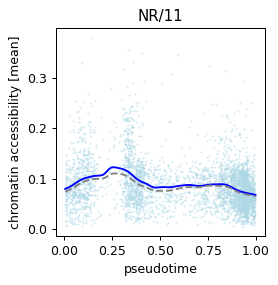

0.5901204762948825

In [ ]:
print('here...')

here...


<Axes: >

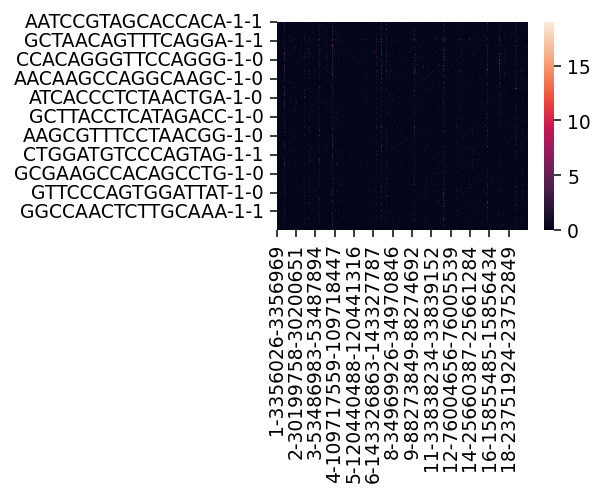

In [ ]:
ad_df = ad.to_df() # .sort_values(ad.obs.velocity_pseudotime)
ad_df['velocity_pseudotime'] = ad.obs.velocity_pseudotime
ad_df = ad_df.sort_values('velocity_pseudotime')
del ad_df['velocity_pseudotime']

ad_df = ad_df[ad_df.sum(axis=1) != 0]

sns.heatmap(ad_df) #  col_cluster=True, row_cluster=False)

In [ ]:
ad

AnnData object with n_obs × n_vars = 4148 × 7200
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'dynamic_score', 'dynamic_score_cluster', 'dynamic_score_z1', 'dynamic_score_z2', 'dynamic_score_abs', 'umap_density_dynamic_score_z1', 'umap_density_dynamic_score_z2', 'velocity_pseudotime'
    var: 'modality', 'acc_score', 'acc_score_rank', 'chr', 'start', 'end', 'summit', 'summit.start', 'summit.end', 'k.summit'
    uns: 'celltype_colors', 'neighbors', 'dynamic_score_z1_colors', 'umap_density_dynamic_score_z1_params', 'umap_density_dynamic_score_z2_params'
    obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'lsi_full', 'lsi_red', 'umap', 'umap_ATAC', 'umap_GEX',

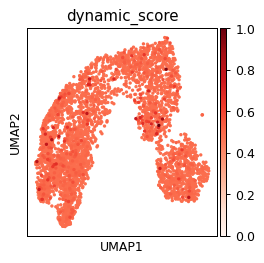

In [ ]:
sc.pl.umap(ad, color='dynamic_score', cmap='Reds')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 7.000e+00, 8.000e+00,
        1.700e+01, 2.100e+01, 2.400e+01, 8.500e+01, 1.870e+02, 4.290e+02,
        2.785e+03, 3.010e+02, 1.180e+02, 5.100e+01, 1.900e+01, 1.900e+01,
        1.200e+01, 9.000e+00, 8.000e+00, 3.000e+00, 7.000e+00, 3.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.02      , 0.04      , 0.06      , 0.08      ,
        0.1       , 0.12      , 0.14      , 0.16      , 0.18000001,
        0.2       , 0.22      , 0.23999999, 0.25999999, 0.28      ,
        0.30000001, 0.31999999, 0.34      , 0.36000001, 0.38      ,
        0.40000001, 0.41999999, 0.44      , 0.46000001, 0.47999999,
        0.5       , 0.51999998, 0.54

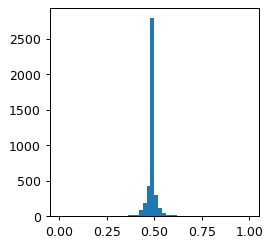

In [ ]:
plt.hist(ad.obs['dynamic_score'], bins=50)

In [ ]:
rna.var_names[rna.var_names.str.contains('Maf')]

Index(['Mafb', 'Mafk', 'Maf', 'Mafg', 'Mafa', 'Maf1', 'Maff'], dtype='object')

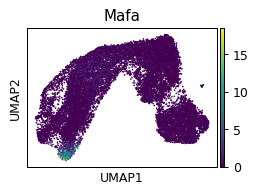

In [ ]:
sc.pl.umap(rna, color='Mafa')

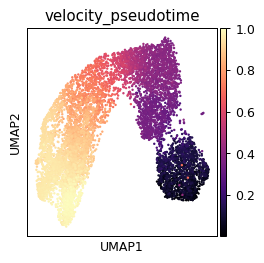

In [ ]:
rcParams['figure.figsize'] = 3, 3
sc.pl.umap(ad, color='velocity_pseudotime', color_map='magma', show=False)
plt.savefig("../../../output/pseudotime_pancreatic_endocrinogenesis.pdf") # basis='umap', groupby='dynamic_score_cluster')
plt.show()
# plt.savefig(

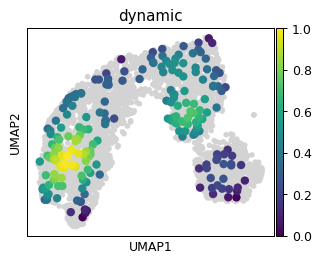

In [ ]:
rcParams['figure.figsize'] = 3, 3
sc.pl.embedding_density(ad, basis='umap', key='umap_density_dynamic_score_z1', group='dynamic', color_map='viridis',
                        save="dynamic_scores_pancreatic_endocrinogenesis.pdf") # basis='umap', groupby='dynamic_score_cluster')
# plt.savefig(

saving figure to file ../../../output/velocity_stream_pancreatic_endocrinogenesis.pdf


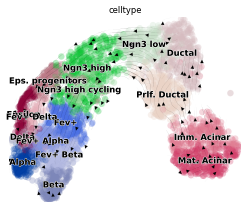

In [ ]:
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = 5, 4
scv.pl.velocity_embedding_stream(rna_sample,
                                 legend_fontsize=10,
                                 color=cell_type_key,
                                 linewidth=.1,
                                 save="../../../output/velocity_stream_pancreatic_endocrinogenesis")

In [ ]:
rna_sample.layers['velocity'].shape

(8161, 14663)

In [ ]:
ad.obs['dynamic_score']

AAACAGCCAACAGCCT-1-0    0.319882
AAACAGCCAACCCTCC-1-0    0.298678
AAACAGCCACTAAGCC-1-0    0.362564
AAACAGCCAGGATAAC-1-0    0.366928
AAACAGCCATAAAGCA-1-0    0.401565
                          ...   
TTTGTGTTCACGAATC-1-1    0.308952
TTTGTGTTCGAGCTAT-1-1    0.292842
TTTGTGTTCTCAATGA-1-1    0.305434
TTTGTTGGTATTGAGT-1-1    0.297811
TTTGTTGGTTGTTGCT-1-1    0.305104
Name: dynamic_score, Length: 8161, dtype: float32

In [ ]:
# this has to be the final 
C = model.graph_module.conn_sparse.detach().cpu()
C = model.graph_module.conn_sparse.detach().cpu().to_dense()
v = C.sum(axis=1)


In [ ]:
v.shape

torch.Size([8161])

In [ ]:
log_dynamic = model.graph_module.log_dynamic
D = model.graph_module.log_dynamic
D_tril = tspa(a_ind, D, C.shape)  # .requires_grad_(True).cuda()
D_triu = tspa(a_ind, -D, C.shape)  # .requires_grad_(True).cuda()
D = D_tril + t(D_triu, 0, 1)

In [ ]:
print('here...')

In [ ]:
D_sum = D.sum(axis=1).shape

: 

In [ ]:
print('here..')

here..


In [ ]:
D.sum(axis=1)

In [ ]:
# debug here almost done.

tsum = torch.sum
texp = torch.exp
tspa = torch.sparse_coo_tensor
tsmm = torch.sparse.mm
t = torch.transpose

log_dynamic = model.graph_module.log_dynamic
D = model.graph_module.log_dynamic
D_tril = tspa(a_ind, D, C.shape)  # .requires_grad_(True).cuda()
D_triu = tspa(a_ind, -D, C.shape)  # .requires_grad_(True).cuda()
D = D_tril + t(D_triu, 0, 1)
# log_dynamic = log_dynamic + -torch.transpose(log_dynamic, 0, 1)
# triu_indices = torch.triu_indices(row=n_rounds, col=n_rounds, offset=1)
D

tensor(indices=tensor([[   0,    0,    0,  ..., 7818, 8070, 8130],
                       [  24, 1345, 1593,  ..., 8160, 8160, 8160]]),
       values=tensor([ 0.43,  0.50,  0.50,  ..., -0.50, -0.50, -0.50]),
       device='cuda:0', size=(8161, 8161), nnz=223368, layout=torch.sparse_coo,
       grad_fn=<AddBackward0>)

In [ ]:
ad.layers['velocity'] = torch.stack([D.detach().cpu().to_dense().sum(axis=1),] * ad.shape[1], axis=1).numpy()
ad.layers['counts'] = ad.X

In [ ]:
sc.pp.neighbors(ad)

In [ ]:
# with the new velocity graph based on learned weights, calculate the 
scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')


computing velocity graph (using 1/20 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:01:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
# model

computing velocity embedding


    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ../../../output/velocity_stream_pancreatic_graph_layer.pdf


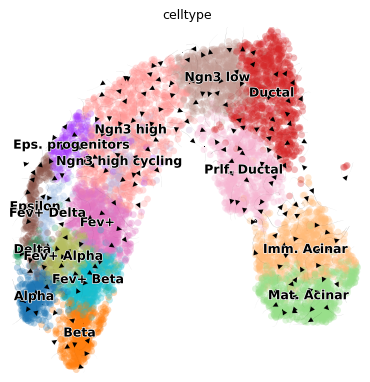

In [ ]:
rcParams['figure.figsize'] = 5, 5,
scv.pl.velocity_embedding_stream(ad,
                                 legend_fontsize=10,
                                 color=cell_type_key,
                                 linewidth=.1,
                                 save="../../../output/velocity_stream_pancreatic_graph_layer")

In [ ]:
!readlink -f ../../../output/velocity_stream_pancreatic_graph_layer

/home/ilibarra/workspace/theislab/mubind/output/velocity_stream_pancreatic_graph_layer


In [ ]:
# scv.tl.velocity_graph(rna_sample_G, vkey='velocity', xkey='counts')
# ax = scv.pl.velocity_embedding_stream(rna_sample_G, color='celltype', show=False) #  X_grid='X_umap', V=V)